# The Problem Statement

**Problem:** One of the biggest challenges for marketers is gaining a deep understanding of their customers and pinpointing their unique needs. By analyzing customer preferences, marketers can create personalized campaigns that effectively meet these needs.

**Task:** Over the past six months, the bank has collected a wealth of customer data. The marketing team’s goal is to use this data to create a targeted advertising campaign by dividing customers into at least three distinct segments.

**Data Source:** https://www.kaggle.com/arjunbhasin2013/ccdata

 - **CUSTID:** Identification of Credit Card holder
 - **BALANCE:** Balance amount left in customer's account to make purchases
 - **BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
 - **PURCHASES:** Amount of purchases made from account
 - **ONEOFFPURCHASES:** Maximum purchase amount done in one-go
 - **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
 - **CASH_ADVANCE:** Cash in advance given by the user
 - **PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 - **ONEOFF_PURCHASES_FREQUENCY:** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
 - **PURCHASES_INSTALLMENTS_FREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
 - **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
 - **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
 - **PURCHASES_TRX:** Number of purchase transactions made
 - **CREDIT_LIMIT:** Limit of Credit Card for user
 - **PAYMENTS:** Amount of Payment done by user
 - **MINIMUM_PAYMENTS:** Minimum amount of payments made by user
 - **PRC_FULL_PAYMENT:** Percent of full payment paid by user
 - **TENURE:** Tenure of credit card service for user

# Import Libriries and Datasets

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
sns.set()

In [212]:
df = pd.read_csv('Marketing_data.csv')

In [213]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [214]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [215]:
# let't fill missing data with mean values
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [216]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [217]:
df.duplicated().sum()

0

In [218]:
# drop customer ID
df = df.drop('CUST_ID', axis=1)

In [219]:
df.shape

(8950, 17)

# Preliminary Data Exploration

In [220]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

- The average balance is $1,564.

- The 'Balance_Frequency' is frequently updated, with an average value of approximately 0.9.

- The average total purchases amount to $1,000.

- The average 'PURCHASES_FREQUENCY' is around 0.5.

- The averages for 'ONEOFF_PURCHASES_FREQUENCY,' 'PURCHASES_INSTALLMENTS_FREQUENCY,' and 'CASH_ADVANCE_FREQUENCY' are generally low.

- The average credit limit is approximately $4,500.

- On average, 15% of the balance is paid in full.

- Most customers have been using the credit card service for about 11 years

In [221]:
# Let's see who made one off purchase of $40761
df[df.ONEOFF_PURCHASES == 40761.250000]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [222]:
# Let's see who made cash advance of $47137
df[df.CASH_ADVANCE == 47137.21176]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

- This customer made 123 cash advance transactions and never paid credit card in full

# Data Exploration and Visualization

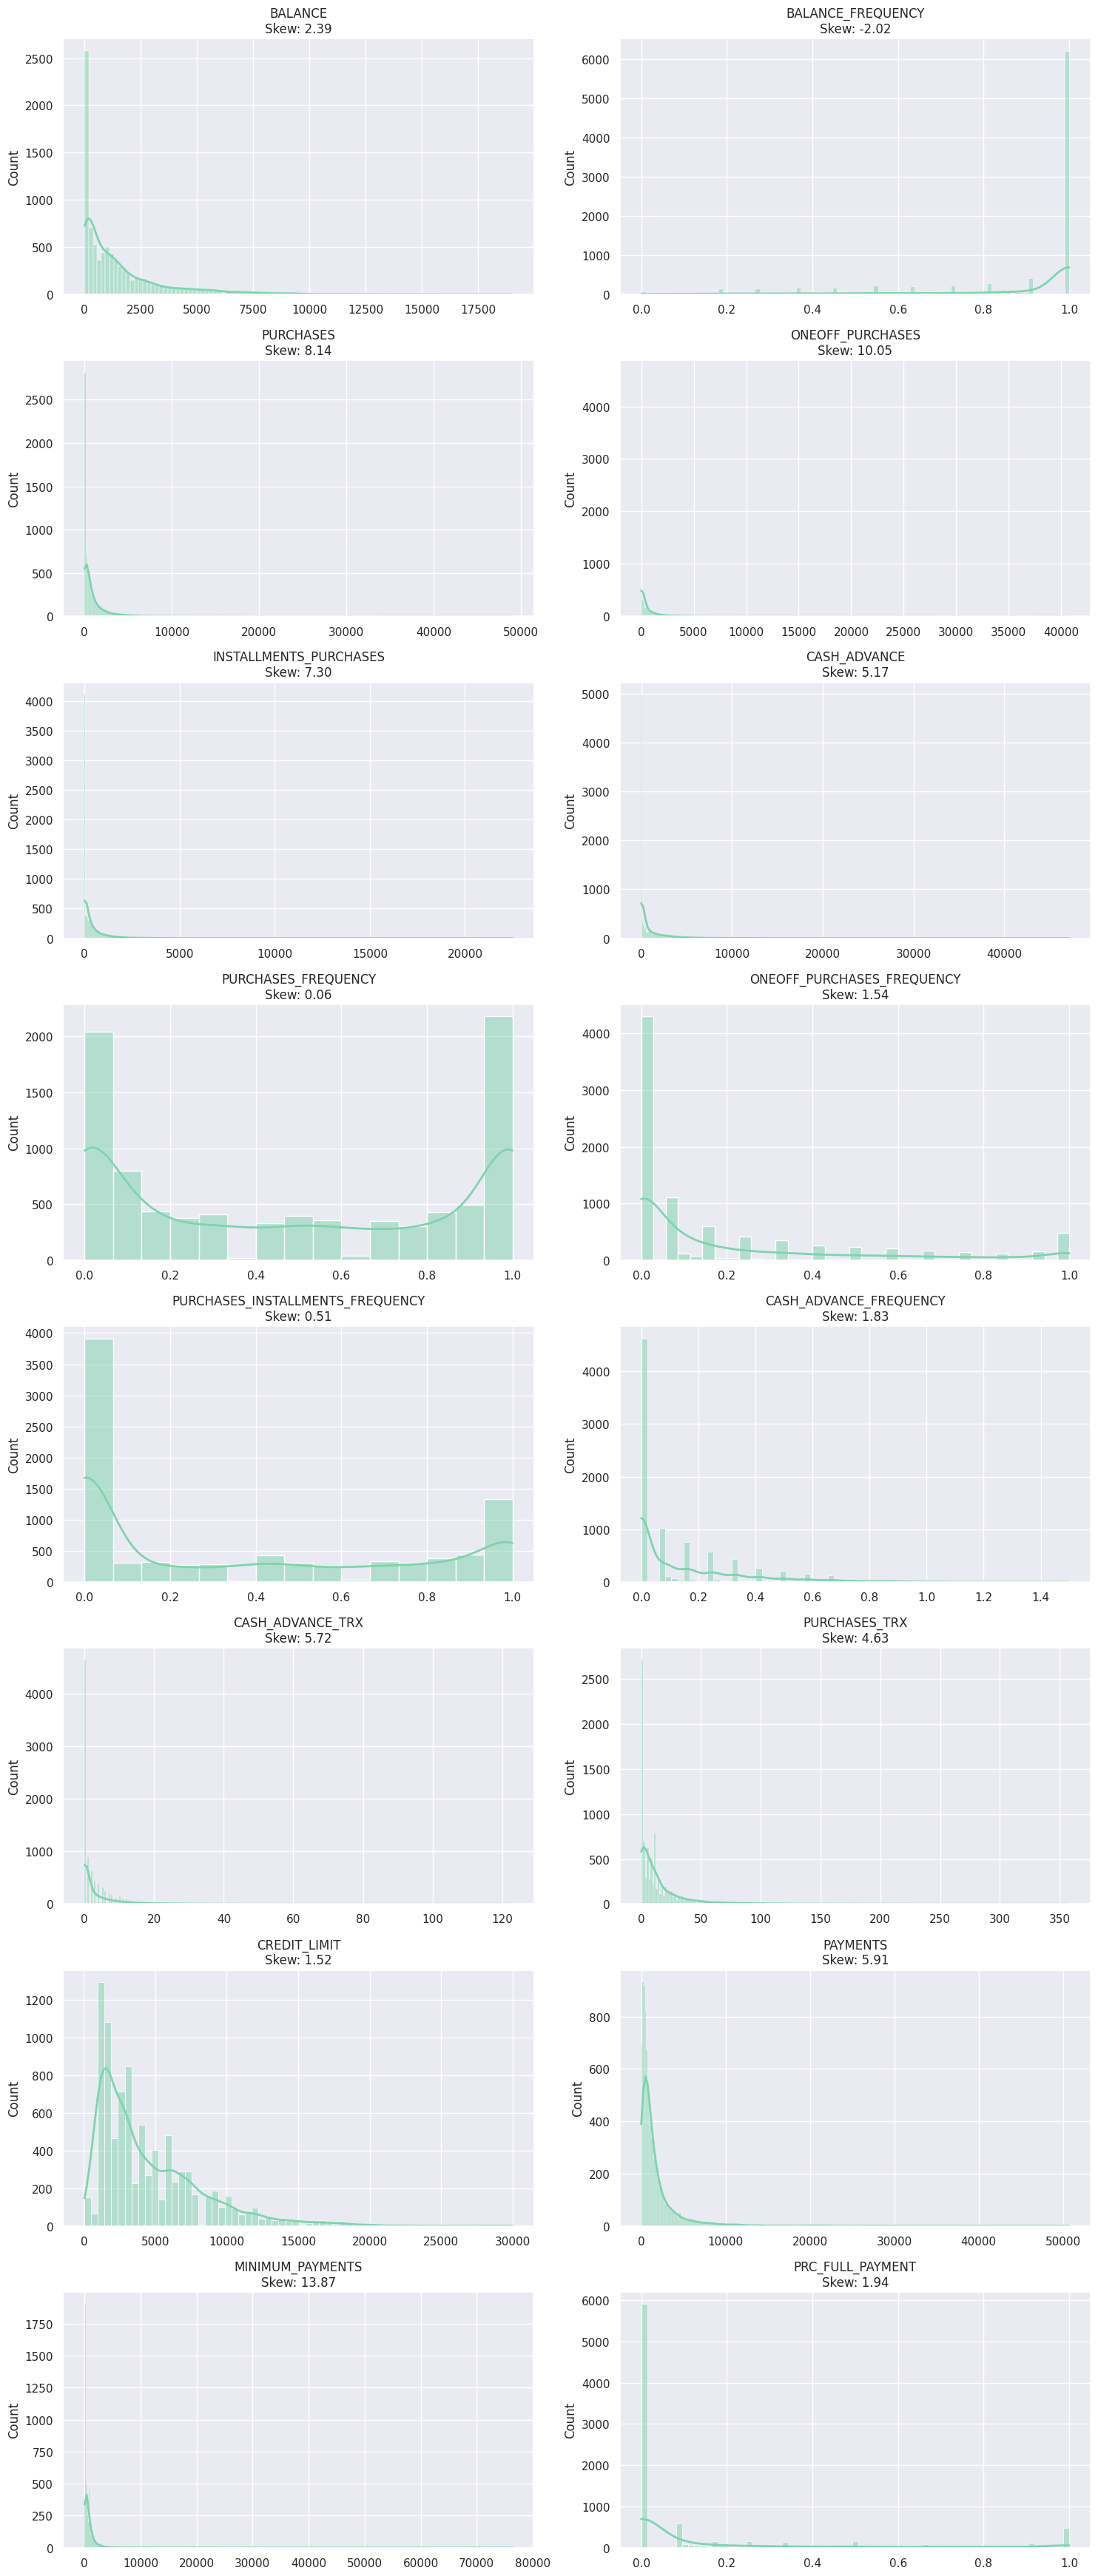

In [223]:
plt.figure(figsize=(15, 35))
num_cols = len(df.columns) - 1
n_rows = (num_cols // 2) + (num_cols % 2)

for i in range(num_cols):
    plt.subplot(n_rows, 2, i + 1)
    skewness = df[df.columns[i]].skew()
    sns.histplot(df[df.columns[i]], color='#7ED4AD', kde=True, line_kws={'linewidth': 2, 'color': '#22177A'})
    plt.title(f'{df.columns[i]}\nSkew: {skewness:.2f}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

- Much of the data is highly skewed, indicating the presence of numerous outliers. This skewness may be caused by one or more clusters with extreme data values.

- The 'Balance_Frequency' indicates that most customers update their balance - frequently, with values close to 1.  

- For 'PURCHASES_FREQUENCY', there are two distinct customer groups, reflecting different purchase patterns.

- The 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' metrics suggest that the majority of users rarely make one-off or installment purchases.

- Only a small proportion of customers pay their balance in full, as indicated by a low 'PRC_FULL_PAYMENT' value, close to 0.

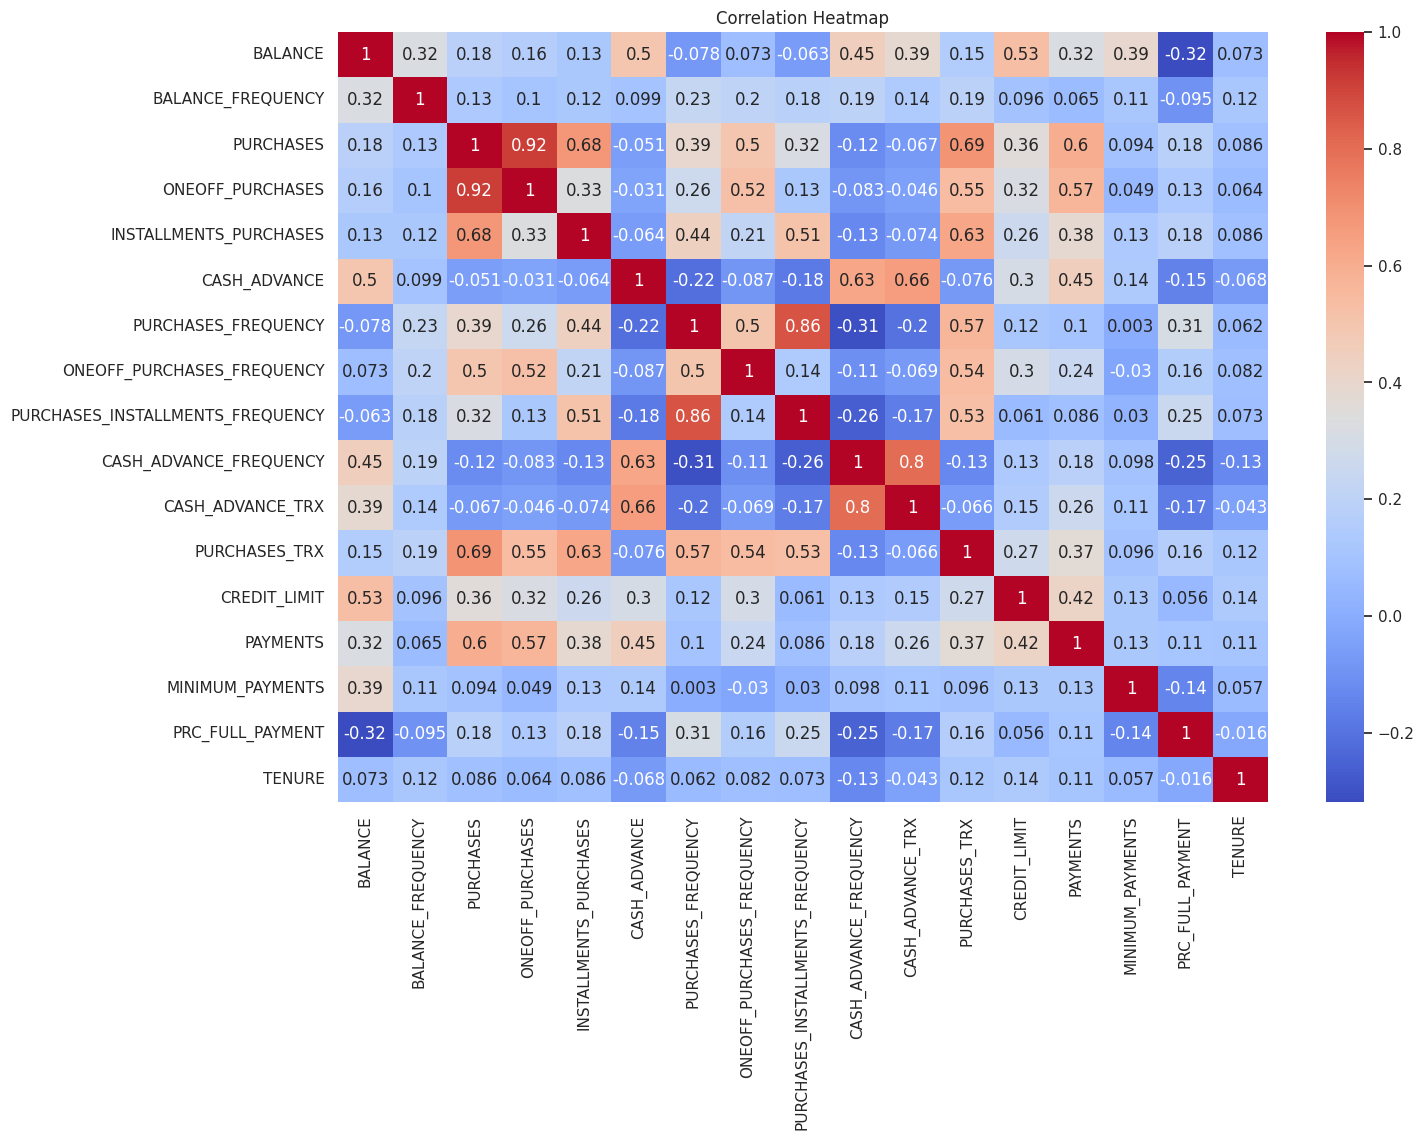

In [224]:
correlations = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **PURCHASES and ONEOFF_PURCHASES (0.92) and PURCHASES_TRX (0.63):**

The very high positive correlation between PURCHASES and ONEOFF_PURCHASES suggests that most purchases are made as one-off transactions. Customers with a high overall purchase volume tend to favor single transactions over installment purchases. Additionally, the strong correlation between PURCHASES and PURCHASES_TRX indicates that a higher number of transactions is closely tied to a greater total purchase volume, with more transactions leading to increased overall spending..

- **PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY (0.86):**

Customers who frequently make purchases are also likely to use installment payment options regularly. This indicates a pattern where frequent buyers often split their spending into multiple installment payments rather than opting for single transactions

- **PURCHASES and INSTALLMENTS_PURCHASES (0.68):**

A strong positive correlation, though lower than with ONEOFF_PURCHASES. This suggests that some customers who make high purchases also utilize installment options, but to a lesser extent compared to one-off purchases.
Marketing strategies could differentiate between customers who favor installments and those who prefer one-off payments.

- **CASH_ADVANCE and CASH_ADVANCE_FREQUENCY (0.63) and CASH_ADVANCE_TRX(0.66):**

This high correlation shows that customers who take cash advances tend to do so frequently, suggesting a pattern of repeated cash withdrawals.
It highlights a segment that relies on cash advances, potentially indicating short-term financial needs or reliance on credit.

# Clustering

In [225]:
seed = 42
np.random.seed(seed)
random.seed(seed)

## Scale the Data


In [226]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [227]:
df_scaled.shape

(8950, 17)

## Elbow method

In [228]:
score = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=seed)
    kmeans.fit(df_scaled)
    score.append(kmeans.inertia_)

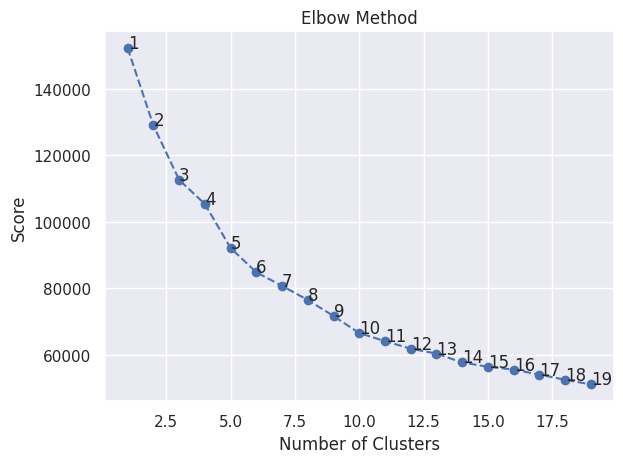

In [229]:
plt.plot(range(1, 20), score, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
for i, txt in enumerate(range(1, 20)):
    plt.annotate(txt, (range(1, 20)[i], score[i]))
    plt.tight_layout()

plt.show()

**It can be observed that the fourth cluster appears to form the elbow of the curve. However, the values do not decrease linearly until the eighth cluster. Therefore, the optimal number of clusters is selected as 8.**

## K-means Data Clustering

In [230]:
kmeans = KMeans(8, random_state=seed, n_init="auto")
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [231]:
kmeans.cluster_centers_.shape

(8, 17)

In [232]:
cluster_centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

In [233]:
cluster_centers_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  2.058233           0.380125  -0.008668         -0.018266   
1 -0.697312          -2.143216  -0.315217         -0.234345   
2 -0.423285           0.306369  -0.059228         -0.245620   
3  0.930844           0.337142  -0.339787         -0.243746   
4  1.374491           0.412070   7.177493          6.384202   
5  0.164517           0.429473   0.940910          0.887776   
6  1.210379           0.466916   0.002326         -0.286478   
7 -0.136799           0.373512  -0.320844         -0.201091   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.012715      3.443464            -0.166359   
1               -0.314691     -0.311810            -0.559017   
2                0.311194     -0.377428             1.006329   
3               -0.355650      0.950975            -0.732450   
4                5.239545      0.016050             1.082454   
5                0.593733     -0.297602             1.099708   
6                0.530986     -0.040978             0.064311   
7               -0.389067     -0.233015            -0.739663   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000556                         -0.114164   
1                   -0.424876                         -0.459982   
2                   -0.378927                          1.188022   
3                   -0.361609                         -0.635260   
4                    1.917512                          1.031769   
5                    1.847568                          0.564352   
6                   -0.558459                          0.305943   
7                   -0.281685                         -0.722615   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                2.464589          3.214804       0.038914      1.388970   
1               -0.483072         -0.366196      -0.425994     -0.210357   
2               -0.481567         -0.370117       0.137881     -0.332000   
3                1.445542          0.994548      -0.430999      0.394792   
4               -0.290144         -0.107898       4.786628      2.181050   
5               -0.393199         -0.307858       1.198653      0.719818   
6               -0.260594         -0.091820       0.196738     -0.058635   
7               -0.134223         -0.197983      -0.443459     -0.397414   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  2.012618          0.571945         -0.287571  0.036356  
1 -0.226025         -0.255247          0.264202 -0.176963  
2 -0.254585         -0.127285          0.402403 -0.042480  
3  0.086235          0.159508         -0.431688 -0.283473  
4  4.962364          0.709040          0.864673  0.332658  
5  0.392337         -0.040770          0.432402  0.276054  
6 -0.083957         10.408907         -0.525551  0.294258  
7 -0.294149         -0.092992         -0.445219  0.100819

In [234]:
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)
cluster_centers = pd.DataFrame(cluster_centers, columns=df.columns)
cluster_centers

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  5848.513259           0.967319    984.685104        562.119201   
1   113.079432           0.369563    329.738267        203.472183   
2   683.443581           0.949847    876.663311        184.758400   
3  3501.948033           0.957137    277.244641        187.868206   
4  4425.362379           0.974886  16338.028250      11188.905375   
5  1906.902342           0.979009   3013.474153       2065.963667   
6  4083.777061           0.987879   1008.174444        116.942444   
7  1279.738367           0.965752    317.717399        258.668039   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              422.565903   8199.976109             0.423583   
1              126.496698    324.991337             0.265990   
2              692.476679    187.386829             0.894239   
3               89.457512   2973.109920             0.196383   
4             5149.122875   1012.529590             0.924792   
5              947.972735    354.785761             0.931716   
6              891.232000    892.937661             0.516162   
7               59.238897    490.228592             0.193488   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.202623                          0.319066   
1                    0.075709                          0.181629   
2                    0.089416                          0.836588   
3                    0.094583                          0.111969   
4                    0.774489                          0.774489   
5                    0.753623                          0.588725   
6                    0.035859                          0.486027   
7                    0.118426                          0.077252   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.628334         25.187500      15.677083   9548.090278   
1                0.038477          0.749806       4.121212   3729.086165   
2                0.038778          0.723047      18.137039   3286.497461   
3                0.424412         10.035885       3.996810   5930.864869   
4                0.077083          2.512500     133.687500  12430.000000   
5                0.056461          1.147920      44.503852   7113.441658   
6                0.082997          2.622222      19.600000   4281.111111   
7                0.108285          1.897740       3.687093   3048.493553   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   7559.476647       2197.100405      6.960499e-02  11.565972  
1   1078.824664        269.364053      2.309892e-01  11.280497  
2    996.144363        567.574172      2.714105e-01  11.460470  
3   1982.786503       1235.932054      2.745343e-02  11.137959  
4  16098.700812       2516.595215      4.066166e-01  11.962500  
5   2868.920117        769.194924      2.801849e-01  11.886749  
6   1490.095282      25121.724754     -8.326673e-17  11.911111  
7    881.610354        647.493591      2.349562e-02  11.652241

In [235]:
cluster_centers.drop(['TENURE'], axis=1, inplace=True)

In [236]:
# Reset index to make it a column for the new index
df_cc = cluster_centers.reset_index()

# Melt the dataframe so that the index (row numbers) becomes columns
cc_transposed = df_cc.set_index('index').transpose().reset_index()
cc_transposed.columns = ['Feature'] + [f'Cluster_{i}' for i in cc_transposed.columns[1:]]
cc_transposed.set_index('Feature', inplace=True)
cc_transposed.sort_values(by='Cluster_0', ascending=False, inplace=True)
cc_transposed

Cluster_0    Cluster_1    Cluster_2  \
Feature                                                                   
CREDIT_LIMIT                      9548.090278  3729.086165  3286.497461   
CASH_ADVANCE                      8199.976109   324.991337   187.386829   
PAYMENTS                          7559.476647  1078.824664   996.144363   
BALANCE                           5848.513259   113.079432   683.443581   
MINIMUM_PAYMENTS                  2197.100405   269.364053   567.574172   
PURCHASES                          984.685104   329.738267   876.663311   
ONEOFF_PURCHASES                   562.119201   203.472183   184.758400   
INSTALLMENTS_PURCHASES             422.565903   126.496698   692.476679   
CASH_ADVANCE_TRX                    25.187500     0.749806     0.723047   
PURCHASES_TRX                       15.677083     4.121212    18.137039   
BALANCE_FREQUENCY                    0.967319     0.369563     0.949847   
CASH_ADVANCE_FREQUENCY               0.628334     0.038477     0.038778   
PURCHASES_FREQUENCY                  0.423583     0.265990     0.894239   
PURCHASES_INSTALLMENTS_FREQUENCY     0.319066     0.181629     0.836588   
ONEOFF_PURCHASES_FREQUENCY           0.202623     0.075709     0.089416   
PRC_FULL_PAYMENT                     0.069605     0.230989     0.271411   

                                    Cluster_3     Cluster_4    Cluster_5  \
Feature                                                                    
CREDIT_LIMIT                      5930.864869  12430.000000  7113.441658   
CASH_ADVANCE                      2973.109920   1012.529590   354.785761   
PAYMENTS                          1982.786503  16098.700812  2868.920117   
BALANCE                           3501.948033   4425.362379  1906.902342   
MINIMUM_PAYMENTS                  1235.932054   2516.595215   769.194924   
PURCHASES                          277.244641  16338.028250  3013.474153   
ONEOFF_PURCHASES                   187.868206  11188.905375  2065.963667   
INSTALLMENTS_PURCHASES              89.457512   5149.122875   947.972735   
CASH_ADVANCE_TRX                    10.035885      2.512500     1.147920   
PURCHASES_TRX                        3.996810    133.687500    44.503852   
BALANCE_FREQUENCY                    0.957137      0.974886     0.979009   
CASH_ADVANCE_FREQUENCY               0.424412      0.077083     0.056461   
PURCHASES_FREQUENCY                  0.196383      0.924792     0.931716   
PURCHASES_INSTALLMENTS_FREQUENCY     0.111969      0.774489     0.588725   
ONEOFF_PURCHASES_FREQUENCY           0.094583      0.774489     0.753623   
PRC_FULL_PAYMENT                     0.027453      0.406617     0.280185   

                                     Cluster_6    Cluster_7  
Feature                                                      
CREDIT_LIMIT                      4.281111e+03  3048.493553  
CASH_ADVANCE                      8.929377e+02   490.228592  
PAYMENTS                          1.490095e+03   881.610354  
BALANCE                           4.083777e+03  1279.738367  
MINIMUM_PAYMENTS                  2.512172e+04   647.493591  
PURCHASES                         1.008174e+03   317.717399  
ONEOFF_PURCHASES                  1.169424e+02   258.668039  
INSTALLMENTS_PURCHASES            8.912320e+02    59.238897  
CASH_ADVANCE_TRX                  2.622222e+00     1.897740  
PURCHASES_TRX                     1.960000e+01     3.687093  
BALANCE_FREQUENCY                 9.878788e-01     0.965752  
CASH_ADVANCE_FREQUENCY            8.299660e-02     0.108285  
PURCHASES_FREQUENCY               5.161616e-01     0.193488  
PURCHASES_INSTALLMENTS_FREQUENCY  4.860270e-01     0.077252  
ONEOFF_PURCHASES_FREQUENCY        3.585853e-02     0.118426  
PRC_FULL_PAYMENT                 -8.326673e-17     0.023496

In [237]:
cc_transposed.shape

(16, 8)

In [238]:
colors = ["#003f5c", "#58508d", "#8a508f", "#bc5090", "#de5a79", "#ff6361", "#ff8531", "#ffa600"]

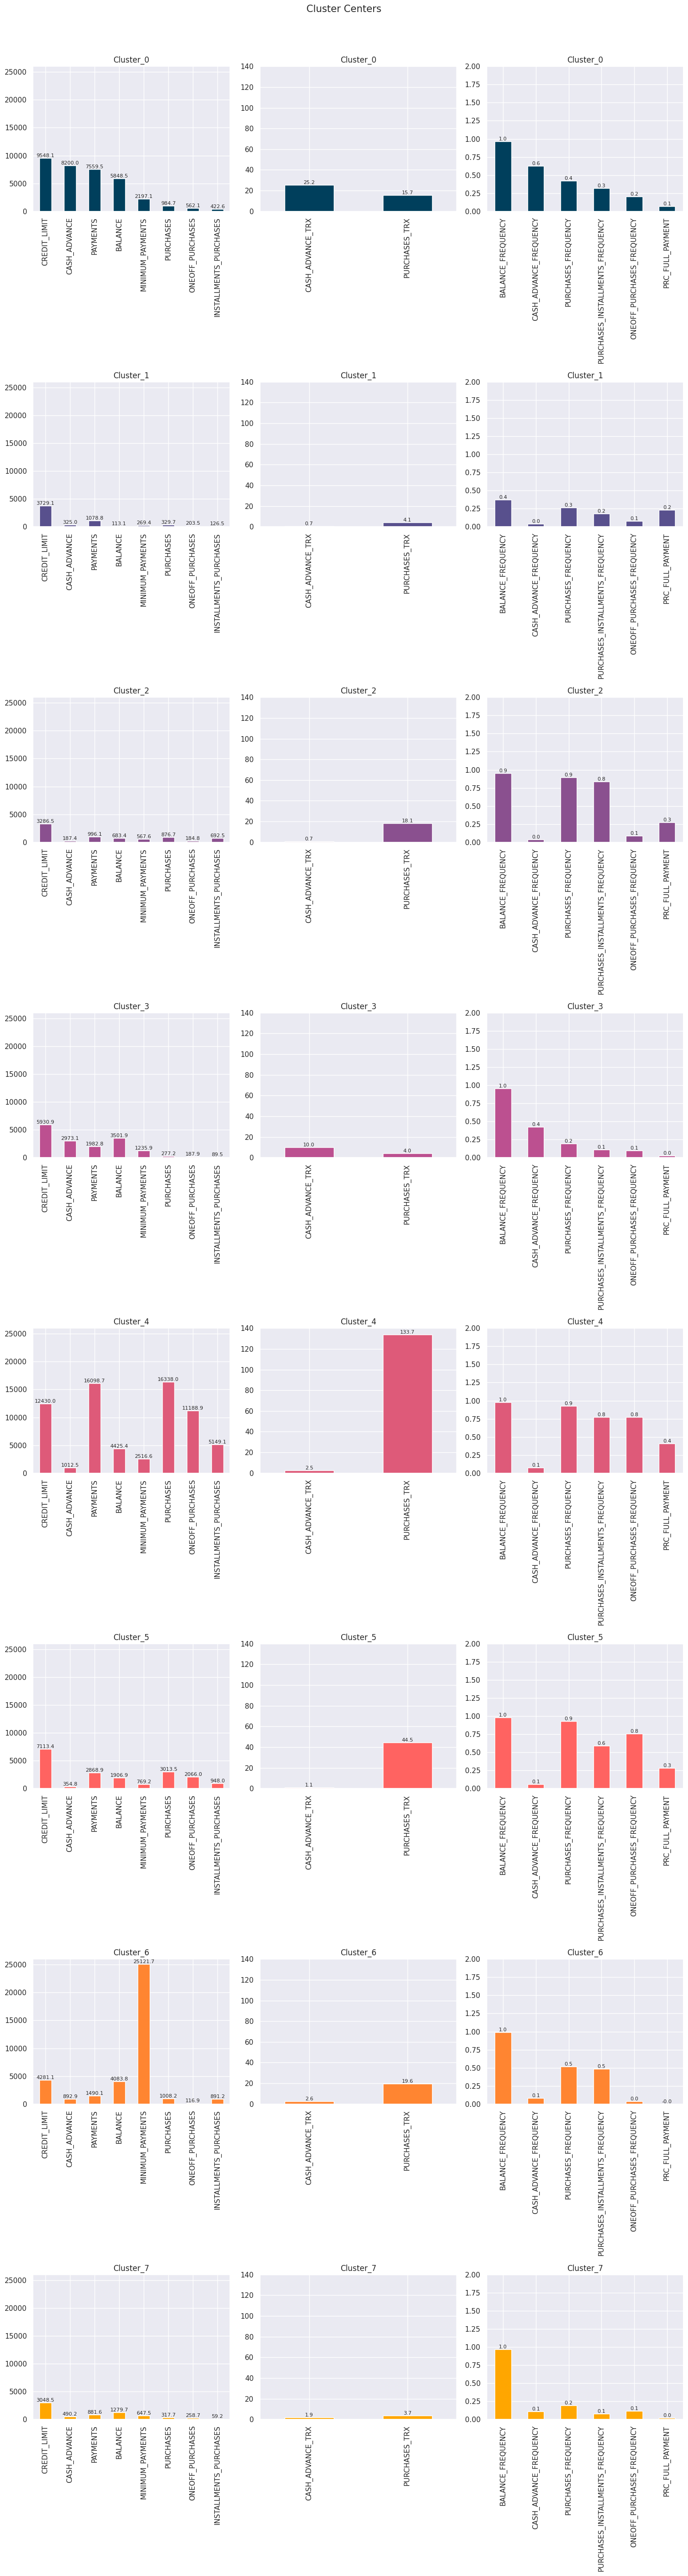

In [239]:
fig, ax = plt.subplots(8, 3, figsize=(15, 55))
fig.suptitle("Cluster Centers", fontsize=15,  y=1.01)


for i, cluster in enumerate(cc_transposed.columns):
  cc_transposed.iloc[0:8][cluster].plot(kind='bar',ax=ax[i][0], title=cluster, ylabel='', xlabel='', color=colors[i])
  cc_transposed.iloc[8:10][cluster].plot(kind='bar',ax=ax[i][1], title=cluster, ylabel='', xlabel='', color=colors[i])
  cc_transposed.iloc[10:16][cluster].plot(kind='bar',ax=ax[i][2], title=cluster, ylabel='', xlabel='', color=colors[i])
  ax[i][0].set_ylim(0, 26000)
  ax[i][1].set_ylim(0, 140)
  ax[i][2].set_ylim(0, 2)
  # Adding data labels
  for j in range(3):
    for p in ax[i][j].patches:
        ax[i][j].annotate(f'{p.get_height():.1f}',
                          (p.get_x() + p.get_width() / 2, p.get_height()),
                          ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()

## Cluster Centers Analysis

### **Revolving Credit Users**

**Cluster 0:**

- Exhibits high values in "CREDIT_LIMIT"(9500), "CASH_ADVANCE"(8200),  and "CASH_ADVANCE_TRX"(25)
- Moderate transaction volume in "PURCHASES_TRX"(15,7)
- High "BALANCE_FREQUENCY" suggests regular credit utilization.
- Displays moderate overall transaction frequency.

**Cluster 3:**

- Shows a similar profile to Cluster 0, but with generally lower values.
- High engagement in "CREDIT_LIMIT"(5900) and "CASH_ADVANCE_TRX"(10).
- Low transaction counts in "PURCHASES_TRX"(4) and moderate frequency metrics.
- Indicates consistent payments with low purchase activity.

### **Regular Purchasers (placed by Decreasing Balance/Activity)**

**Cluster 4:**

- Characterized by very high "PURCHASES"(16000), "PURCHASES_TRX"(134),"CREDIT_LIMIT"(12400) and "PAYMENTS"(16000).
- Lower reliance on "CASH_ADVANCE"(1000)/"CASH_ADVANCE_TRX"(2.5) with a focus on standard purchases - "PURCHASES_TRX"(133).
- High transaction frequency indicates active purchasing behavior - "PURCHASES_FREQUENCY"(0,9).

**Cluster 5:**

- Similar to Cluster 4 but with lower values across all metrics.
- Moderate activity in "PURCHASES_TRX"(44) and lower transaction frequency.
- High "PURCHASES_FREQUENCY"(0,9) and low "CASH_ADVANCE_FREQUENCY"(0,1) indicates limited use of credit for cash needs.

**Cluster 2:**

- Comparable to Clusters 4 and 5, with lower values overall.
- Displays moderate levels in "PURCHASES" and "CREDIT_LIMIT."
- Balanced transaction frequencies suggest consistent, average purchasing behavior.

### **Low Engagement Users**

**Cluster 1:**

- Shows low values across most metrics when compared to other clusters.
- Significantly low "PURCHASES"(300) and "MINIMUM_PAYMENTS"(300)
- Low "BALANCE_FREQUENCY"(0,4) and   "PURCHASES_TRX"(4,1) points to infrequent credit card activity.

**Cluster 7:**

- Low engagement in both payments and purchases.
- Notably low in "PURCHASES" and "MINIMUM_PAYMENTS."
- Consistent "PURCHASES_FREQUENCY"(0,4) and regular "BALANCE_FREQUENCY"(1) reflect a moderate but cautious financial behavior.

### **Luxury Purchasers**

**Cluster 6:**

- Moderate balance and credit limit, with the highest "MINIMUM_PAYMENTS" (25,000!) among all clusters.
- Moderate transaction frequency.
- Low "PRC_FULL_PAYMENT" (0) suggests less frequent full balance payments.
- Indicates a segment focused on frequent and high-value purchases, with careful payment management.

**General Observations**

- The clustering clearly identifies different financial personas, ranging from cash-dependent users to high-frequency shoppers and luxury spenders.

- Segmentation shows that behavior patterns are not only driven by spending capacity but also by the frequency of credit engagement and willingness to utilize credit for liquidity.

The segmentation analysis highlights four primary user personas driven by different financial behaviors, ranging from credit-reliant users to high-frequency purchasers and luxury spenders. Although the initial KMeans analysis identified 8 clusters, a closer examination of the cluster centers allowed for a logical consolidation into these four broader categories. Applying dimensionality reduction techniques like Principal Component Analysis (PCA) will further refine this segmentation, ensuring a more streamlined and effective targeting strategy for credit card products and customer engagement.

# Dimentionality Reduction (Principal Component Analysis)

In [240]:
# Obtain the principal components
pca = PCA(2)
principal_comp = pca.fit_transform(df_scaled)

In [241]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp, columns= ['pca1', 'pca2'])

In [242]:
# Concatenate the clusters labels to the dataframe
pca_clusters = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

## PCA scatterplot (8 clusters)

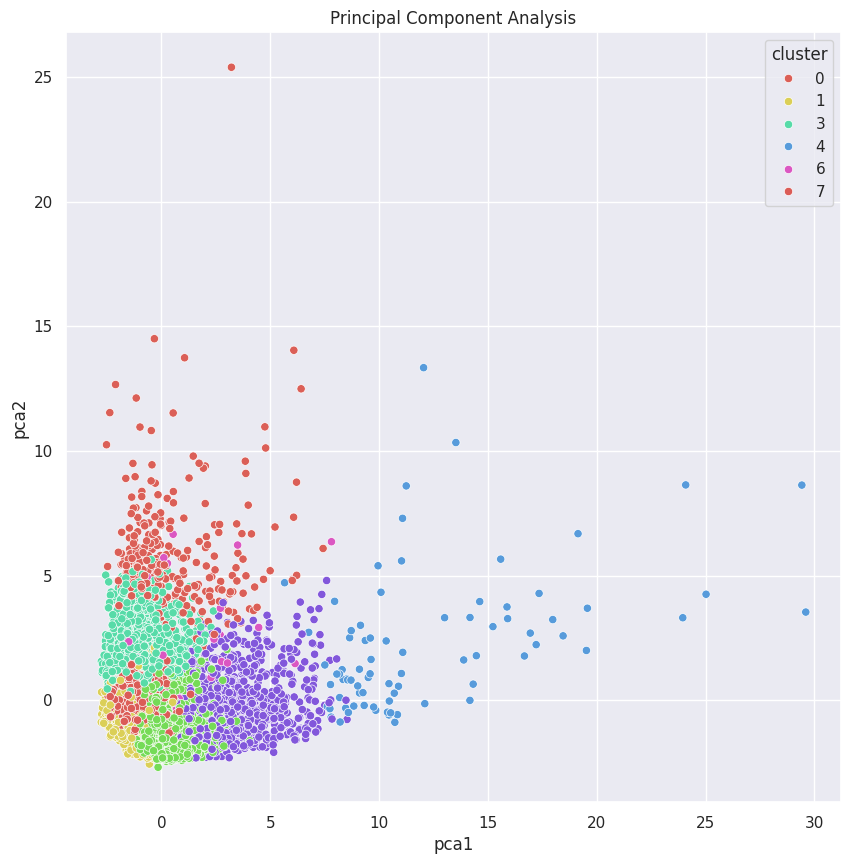

In [243]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_clusters, palette="hls")
plt.title('Principal Component Analysis')
plt.show()

**In the scatter plot, we observe 8 clusters, but some overlap, lacking clear visual separation**

## Enhanced Biplot of PC with Feature Loadings

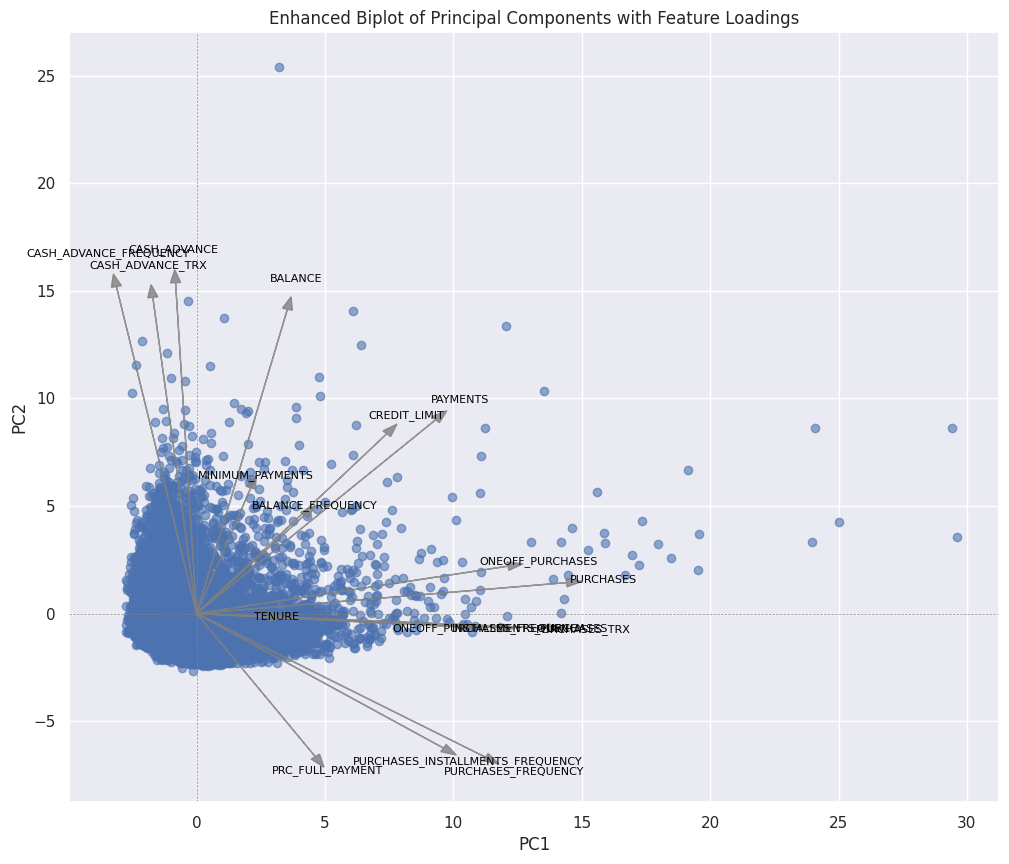

In [244]:
arrow_scale = 35

# Create a biplot with enhanced clarity
plt.figure(figsize=(12, 10))

# Scatter plot for the first two principal components
scores = principal_comp
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.6)

# Plot arrows (loadings) for the original features
for i, feature in enumerate(df.columns):
    # Scale the arrow length by 'arrow_scale'
    plt.arrow(0, 0, pca.components_[0, i] * arrow_scale, pca.components_[1, i] * arrow_scale,
              color='grey', alpha=0.8, head_width=0.4)

    # Offset the text labels for better readability
    plt.text(pca.components_[0, i] * arrow_scale * 1.1,
             pca.components_[1, i] * arrow_scale * 1.1,
             feature, color='black', ha='center', va='center', fontsize=8)

# Customize plot aesthetics
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Enhanced Biplot of Principal Components with Feature Loadings')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.5, linestyle='--')
plt.show()

In [245]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance for PCA1 and PCA2
cumulative_explained_variance = np.sum(explained_variance_ratio) * 100

print(f'PCA1 and PCA2 together explain {cumulative_explained_variance:.2f}% of the variance.')

PCA1 and PCA2 together explain 47.59% of the variance.


- **Two-dimensional PCA plot shows that the most important patterns that represent 47.59% of the dataset’s variability.**

- **The remaining 52.41% of the variance is captured by the other components (PC3, PC4, etc.).**

**Let's see how many components explaines 90% of data**

## Explained Variance by Number of PC

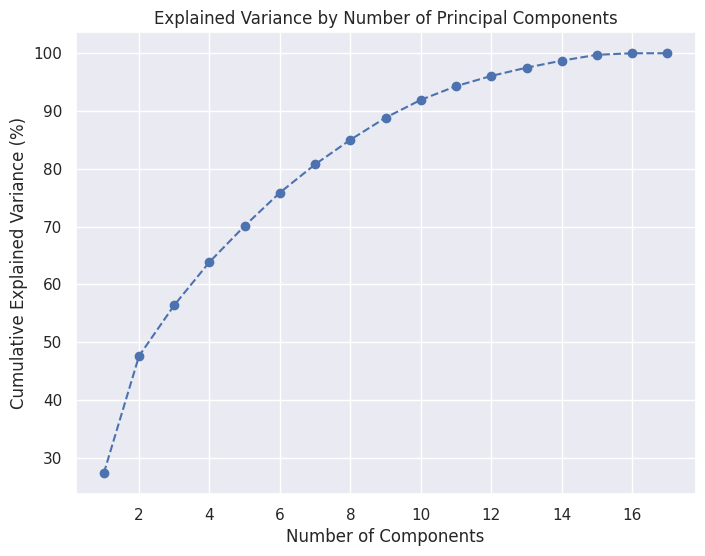

In [246]:
pca_full = PCA().fit(df_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100

# Plot Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

**9 components account for approximately 90% of the dataset's variability.**

In [247]:
loadings = pd.DataFrame(pca_full.components_, columns=df.columns)
loadings.index = [f'PC{i+1}' for i in range(len(df.columns))]

loadings

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
PC1   0.101077           0.120043   0.411642          0.346407   
PC2   0.403957           0.130537   0.041038          0.062872   
PC3   0.160075           0.420630  -0.257903         -0.392115   
PC4   0.283454           0.149742   0.039111          0.078155   
PC5  -0.047603           0.484563  -0.031287          0.155846   
PC6  -0.039897          -0.035317  -0.176295         -0.184610   
PC7   0.252376          -0.104751  -0.203290         -0.121706   
PC8  -0.169446           0.258930   0.019794          0.125738   
PC9   0.130322           0.621381   0.105111          0.018085   
PC10 -0.030909           0.081380  -0.051208          0.175634   
PC11  0.146699          -0.118715   0.200909          0.447872   
PC12  0.480161          -0.096074  -0.075423          0.052596   
PC13 -0.526335           0.188737  -0.113344          0.008892   
PC14 -0.172280           0.041242   0.225618          0.225415   
PC15 -0.218214          -0.040300   0.051029          0.055639   
PC16 -0.005264          -0.011175   0.002191         -0.004630   
PC17 -0.000042          -0.000009   0.748975         -0.581943   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
PC1                 0.336814     -0.023343             0.321493   
PC2                -0.018533      0.439242            -0.190780   
PC3                 0.110488      0.027345             0.374691   
PC4                -0.051130     -0.254586            -0.188975   
PC5                -0.360266     -0.096677             0.092435   
PC6                -0.077674      0.146755             0.037226   
PC7                -0.257153      0.050042             0.156066   
PC8                -0.184236     -0.021079            -0.033855   
PC9                 0.215313     -0.051407            -0.221766   
PC10               -0.443682      0.359177             0.250863   
PC11               -0.347683     -0.354579             0.117562   
PC12               -0.274851      0.181522            -0.158873   
PC13               -0.284080     -0.021081            -0.192263   
PC14                0.119260      0.610559            -0.011768   
PC15                0.018453      0.208624             0.023090   
PC16                0.014566     -0.007033             0.678157   
PC17               -0.316826     -0.000022             0.000159   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
PC1                     0.294633                          0.274710   
PC2                    -0.017924                         -0.178601   
PC3                    -0.115131                          0.473409   
PC4                     0.027465                         -0.215002   
PC5                     0.531553                         -0.180203   
PC6                    -0.024754                          0.052384   
PC7                     0.290682                         -0.036313   
PC8                     0.103503                         -0.155530   
PC9                    -0.400015                         -0.075056   
PC10                   -0.109509                          0.252409   
PC11                   -0.375307                          0.287440   
PC12                   -0.160922                          0.018669   
PC13                   -0.250041                          0.043490   
PC14                   -0.047419                         -0.037431   
PC15                    0.017887                          0.066806   
PC16                   -0.341535                         -0.633640   
PC17                   -0.000143                         -0.000173   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
PC1                -0.089139         -0.048654       0.390695      0.211663   
PC2                 0.434082          0.419734      -0.019394      0.238678   
PC3                 0.109072          0.115541       0.077331     -0.100483   
PC4                -0.264228      

In [248]:
top_contributing_features = loadings.abs().apply(lambda x: x.nlargest(4).index.tolist(), axis=1)
pd.set_option('display.max_colwidth', None)
top_contributing_features.iloc[:9]

PC1                            [PURCHASES, PURCHASES_TRX, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES]
PC2                               [CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, BALANCE]
PC3    [PURCHASES_INSTALLMENTS_FREQUENCY, BALANCE_FREQUENCY, ONEOFF_PURCHASES, PURCHASES_FREQUENCY]
PC4                                  [TENURE, PRC_FULL_PAYMENT, MINIMUM_PAYMENTS, CASH_ADVANCE_TRX]
PC5       [ONEOFF_PURCHASES_FREQUENCY, BALANCE_FREQUENCY, MINIMUM_PAYMENTS, INSTALLMENTS_PURCHASES]
PC6                                      [TENURE, PRC_FULL_PAYMENT, CREDIT_LIMIT, MINIMUM_PAYMENTS]
PC7                            [CREDIT_LIMIT, TENURE, PRC_FULL_PAYMENT, ONEOFF_PURCHASES_FREQUENCY]
PC8                           [MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, CREDIT_LIMIT, BALANCE_FREQUENCY]
PC9             [BALANCE_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PRC_FULL_PAYMENT, CASH_ADVANCE_TRX]
dtype: object

**Let's examine the top 4 most influential features in the first 9 components (PC1 to PC9)**

## Identifying the Most Influential Features

In [249]:
features = []

for i in range(9):
  for j in range(4):
    if top_contributing_features.iloc[:9][i][j] not in features:
      features.append(top_contributing_features.iloc[:9][i][j])

len(features)

<ipython-input-249-cd3f1f14b519>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if top_contributing_features.iloc[:9][i][j] not in features:
<ipython-input-249-cd3f1f14b519>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features.append(top_contributing_features.iloc[:9][i][j])


16

In [250]:
features

['PURCHASES',
 'PURCHASES_TRX',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'BALANCE',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'TENURE',
 'PRC_FULL_PAYMENT',
 'MINIMUM_PAYMENTS',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CREDIT_LIMIT']

**We have identified 12 out of 17 features as potentially the most valuable for clustering our data. Let's visualize them.**

## Exploring Clusters and Key Features Through Data Visualization

In [251]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

In [252]:
# define potentially most valuable features for analysis
columns = ['CREDIT_LIMIT', 'PAYMENTS',  'PURCHASES',  'BALANCE',
           'ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES',
           'PURCHASES_TRX',  'PURCHASES_FREQUENCY',  'PURCHASES_INSTALLMENTS_FREQUENCY',
           'CASH_ADVANCE_TRX']

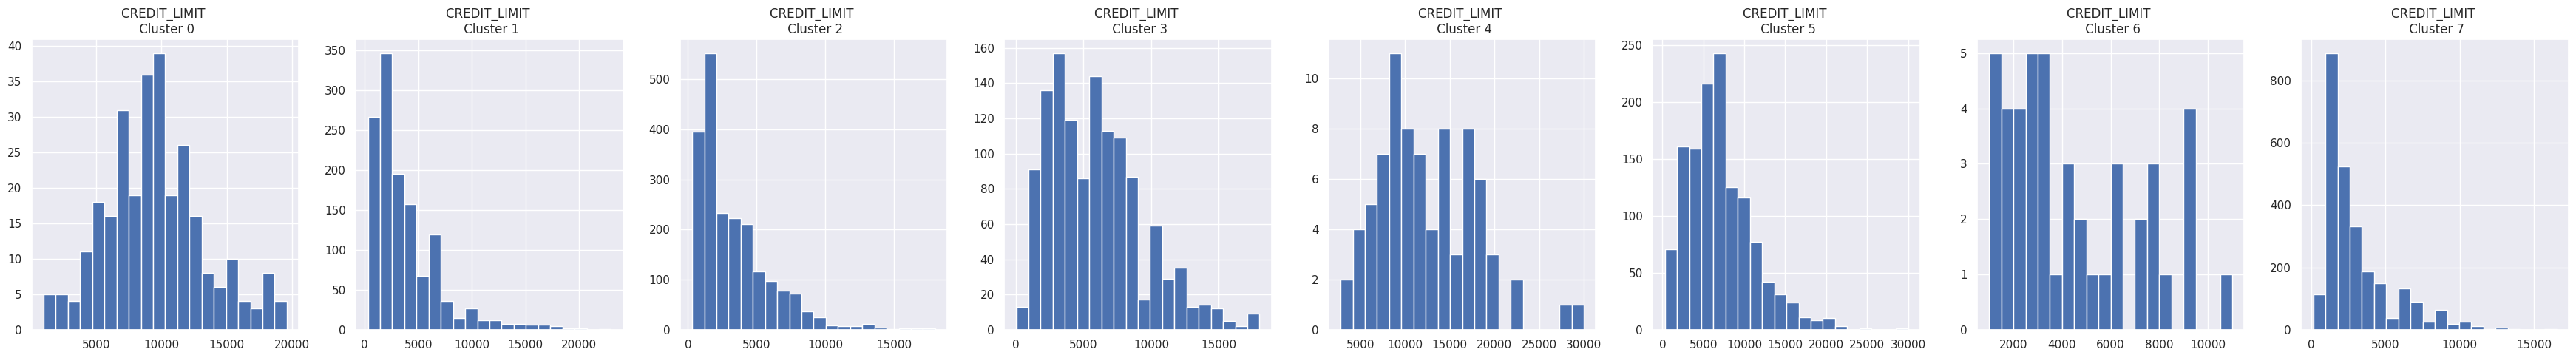

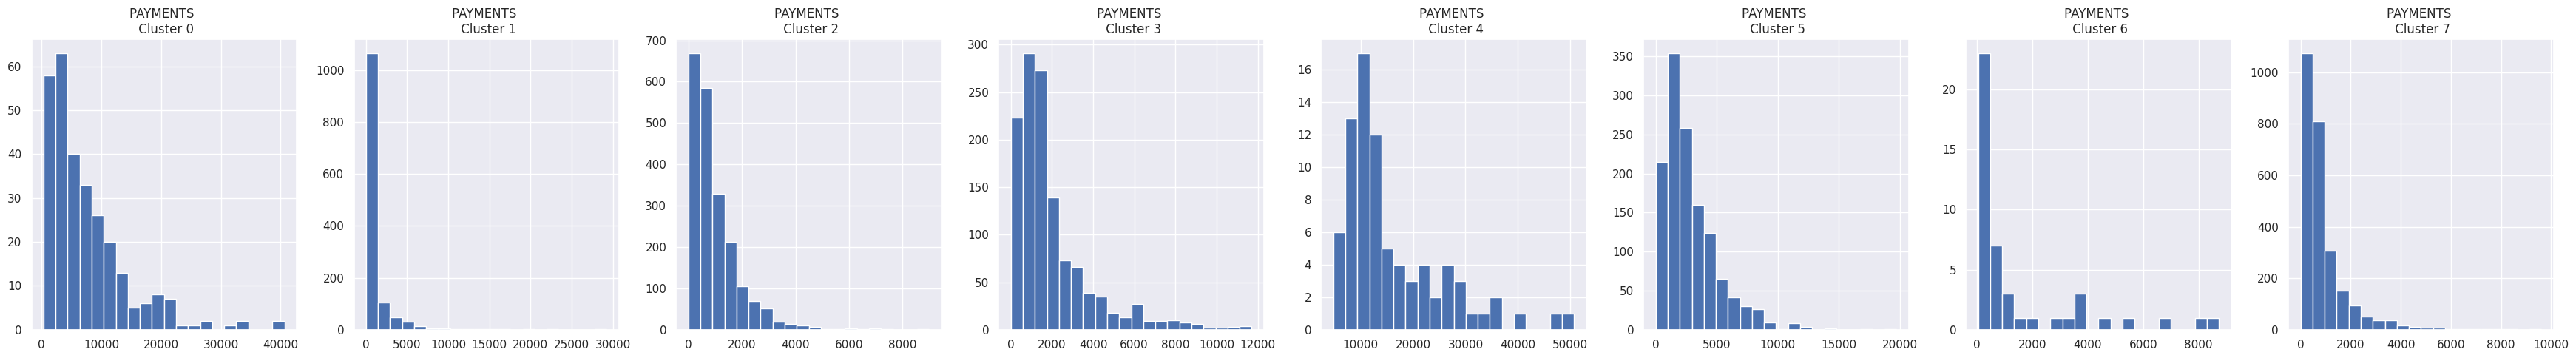

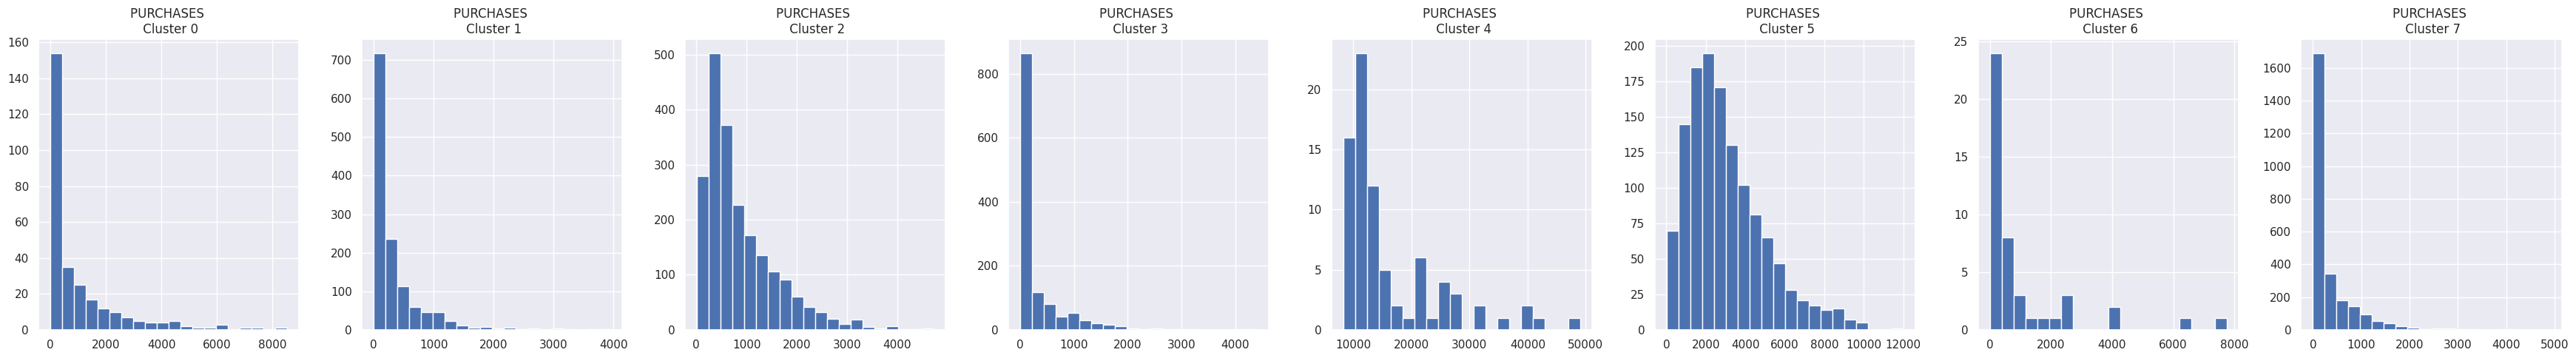

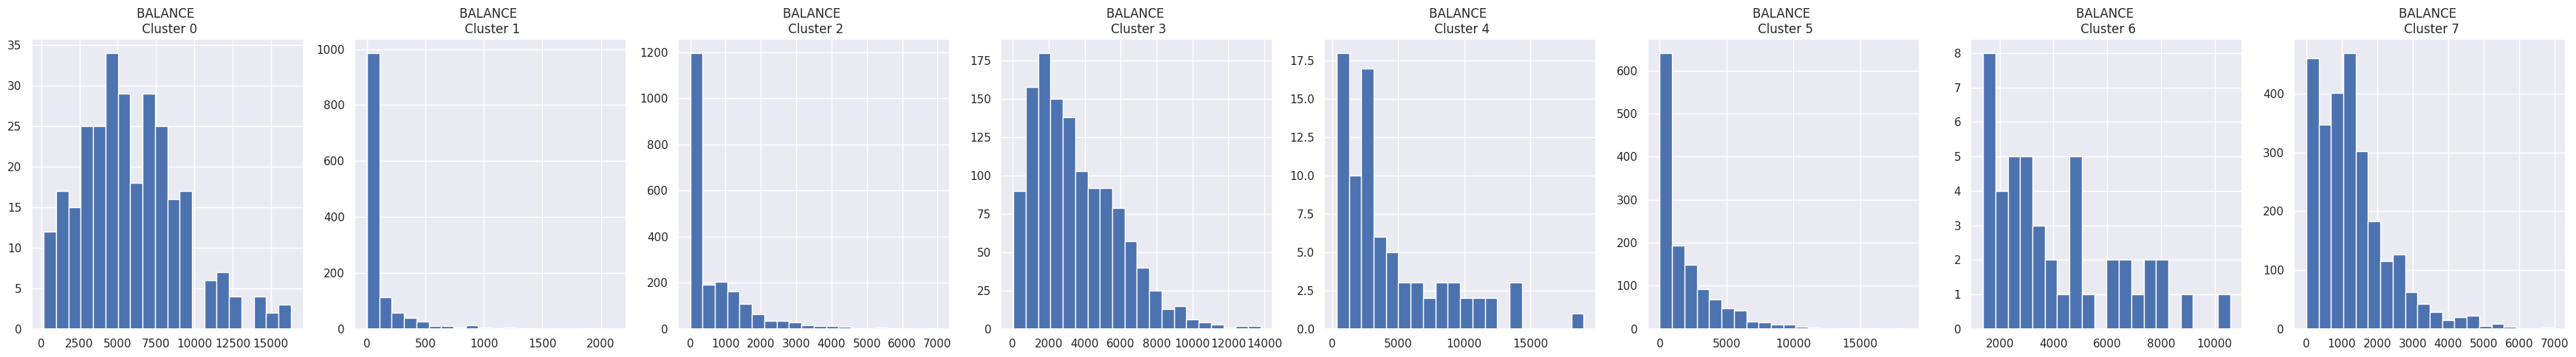

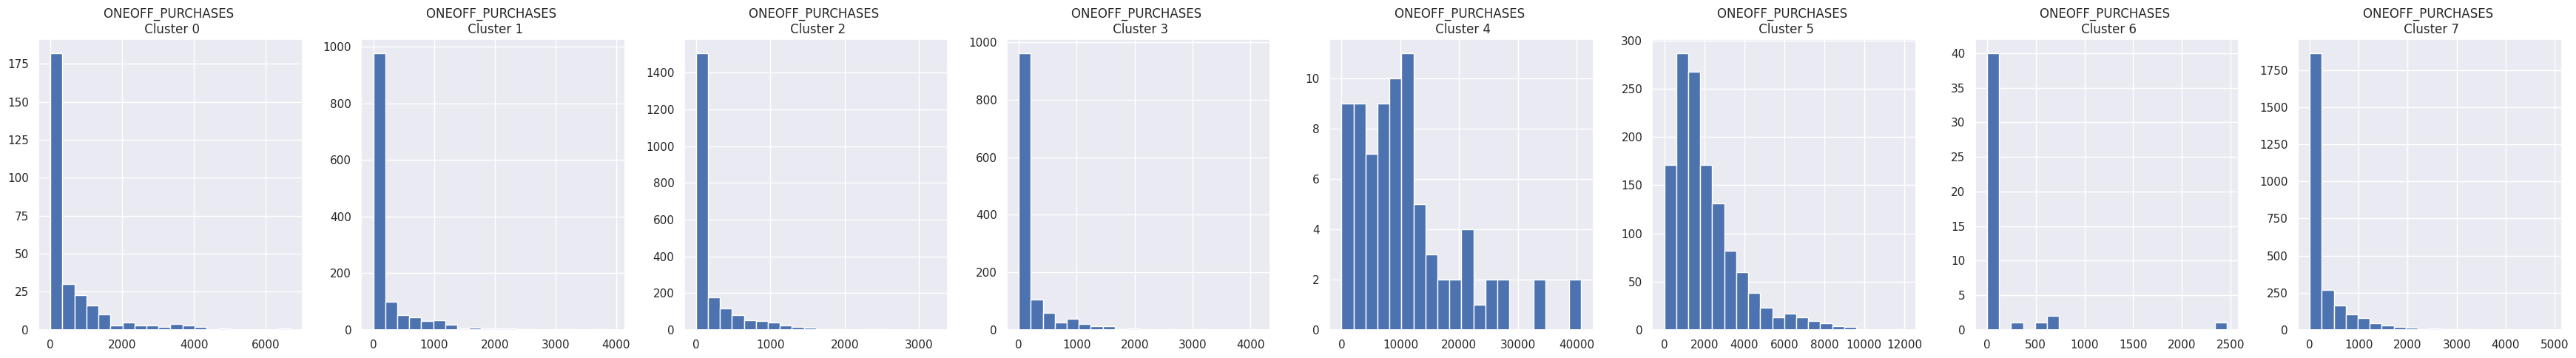

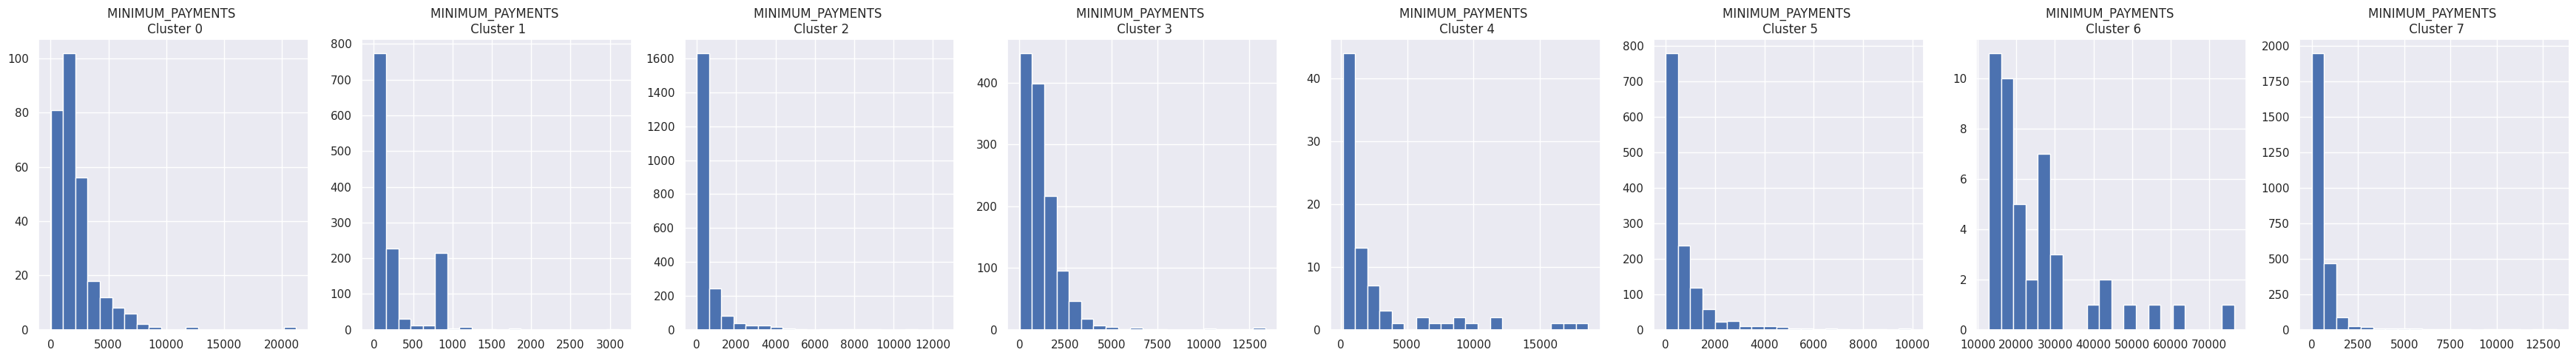

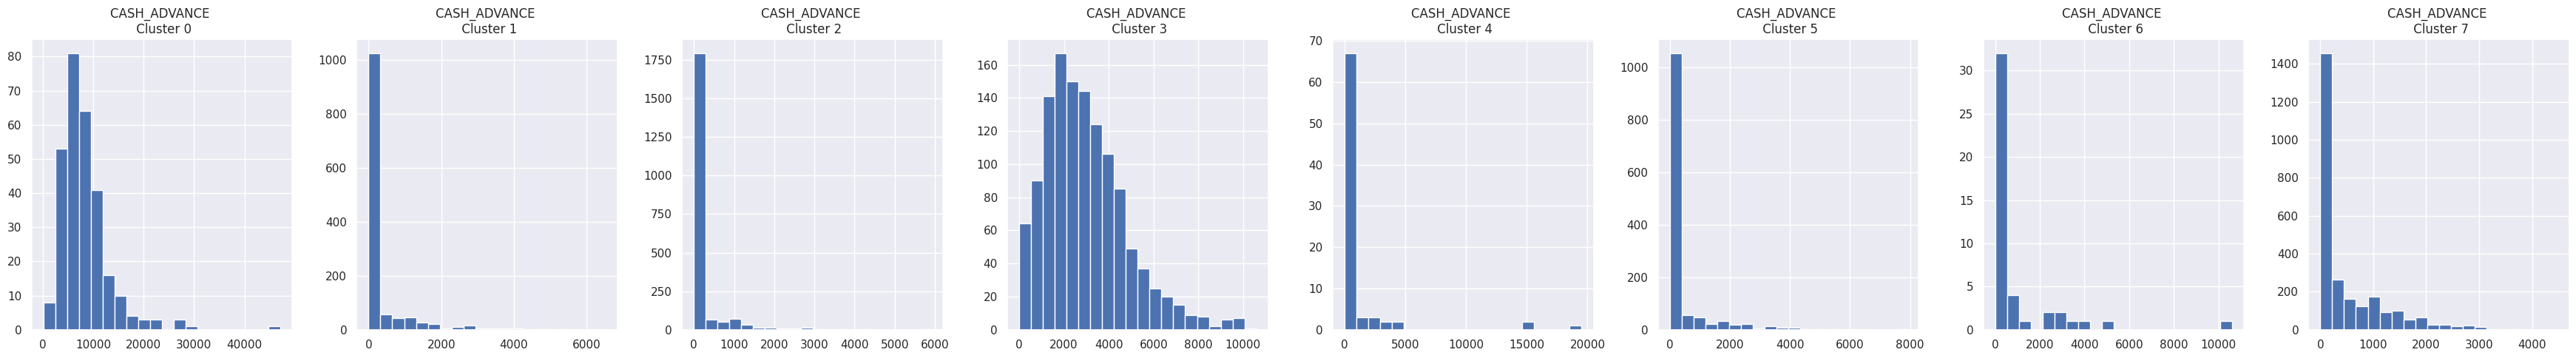

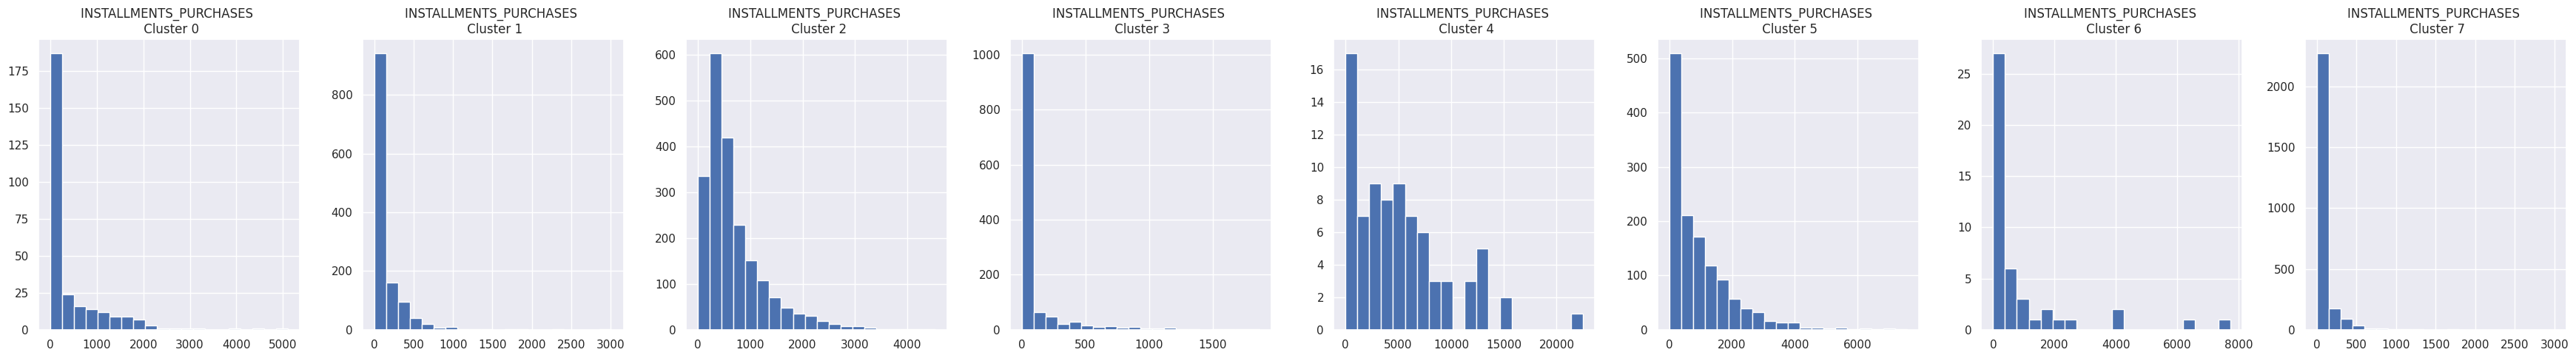

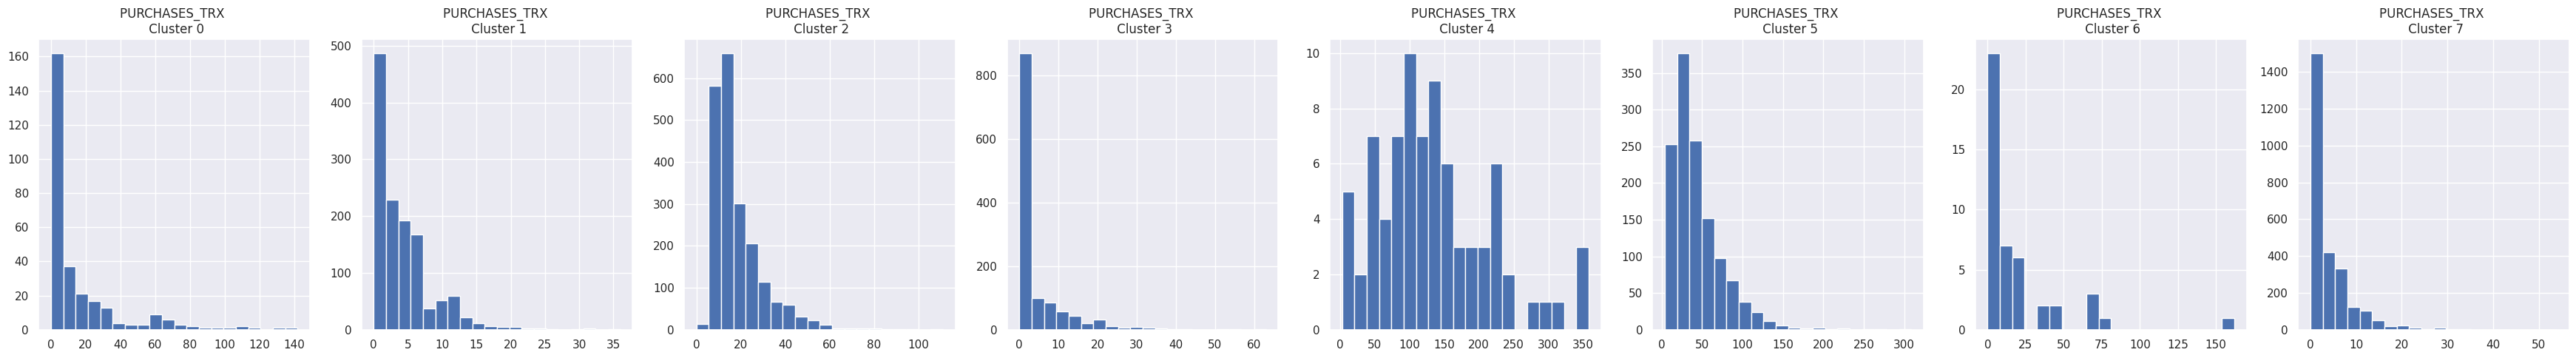

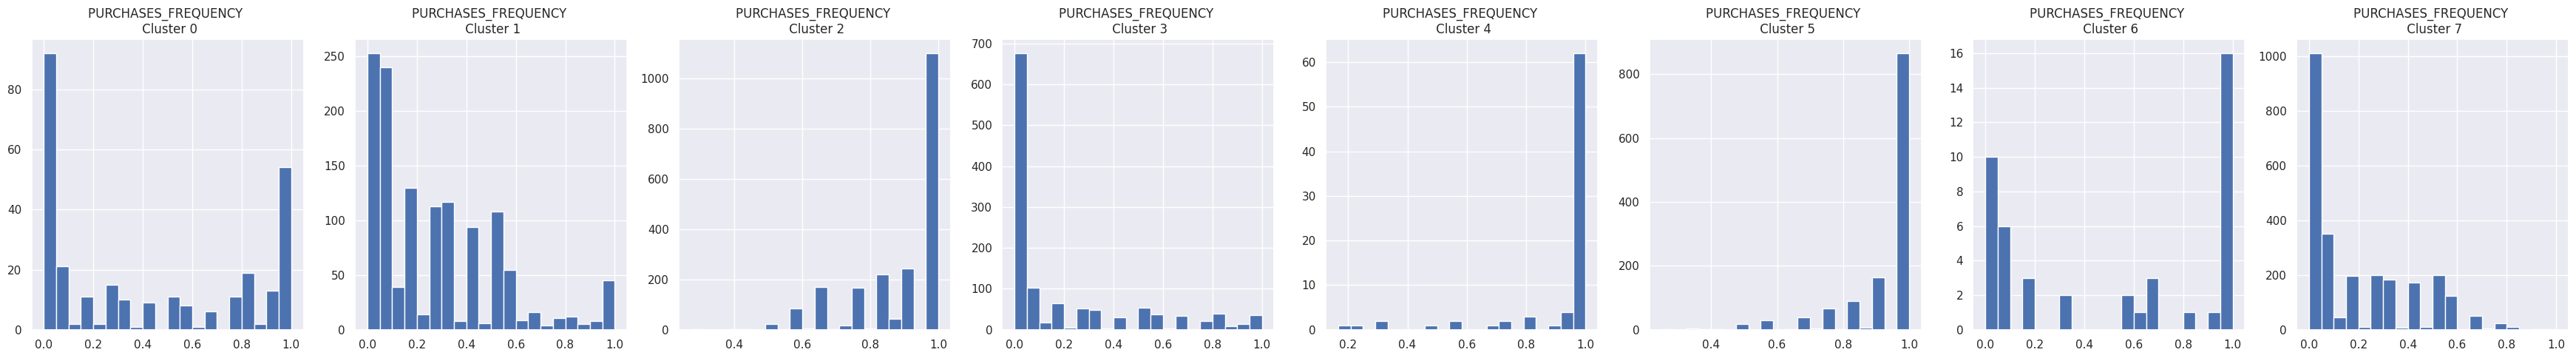

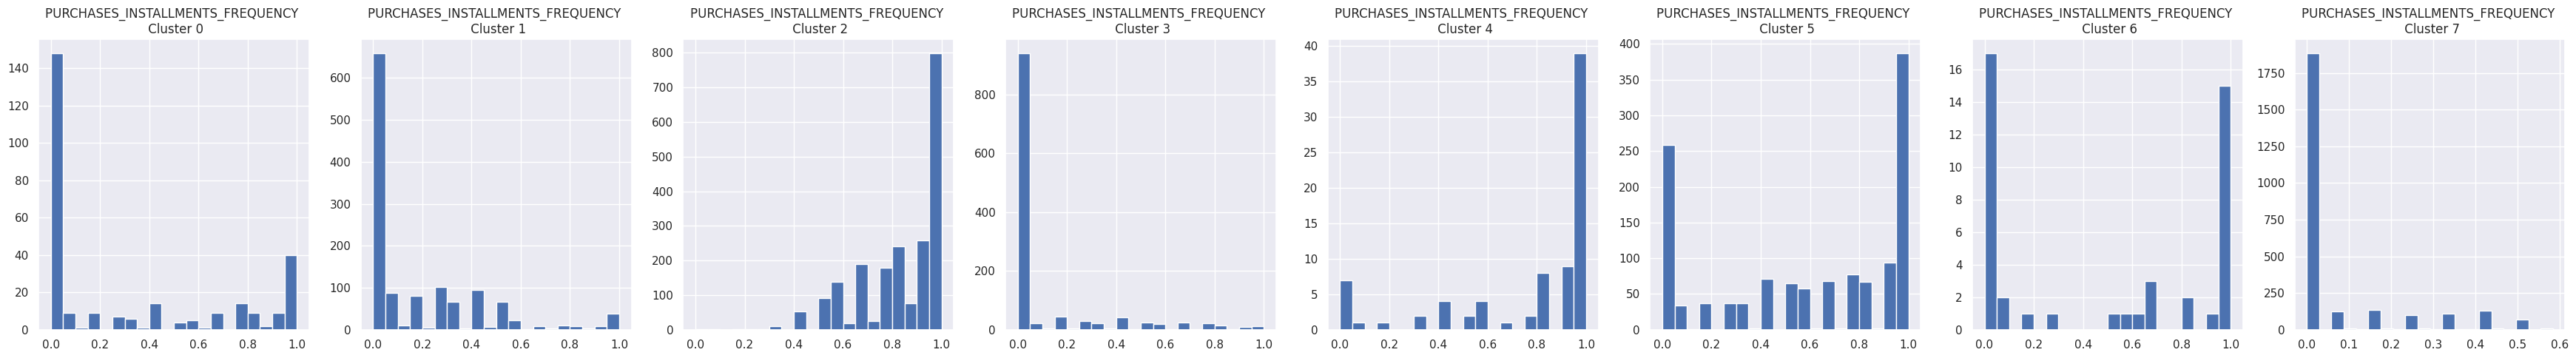

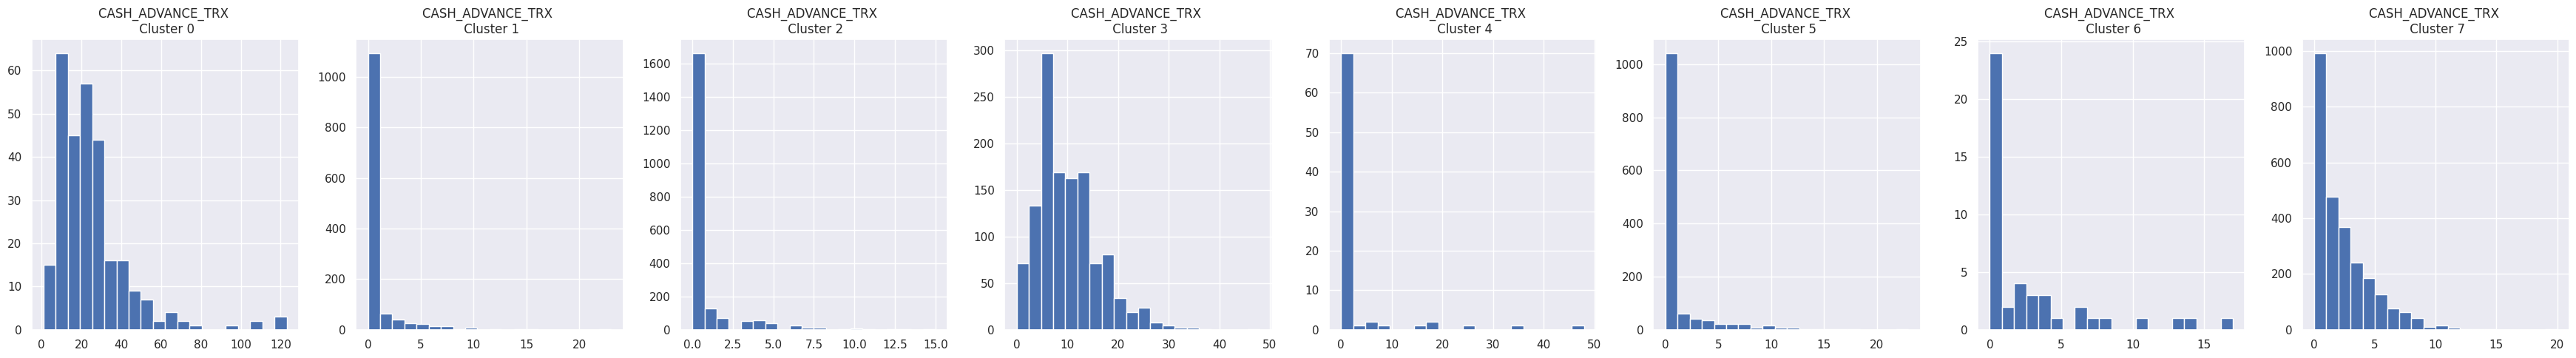

In [253]:
# let's see data distribution for each cluster

for i in columns:
    fig, axes = plt.subplots(1, 8, figsize=(35, 5), sharey=False)  # Share y-axis across subplots

    for j, ax in enumerate(axes):
        cluster = df_cluster[df_cluster['cluster'] == j]
        ax.hist(cluster[i], bins=20)
        ax.set_title('{} \n Cluster {}'.format(i, j))

    plt.tight_layout()
    plt.show()
    plt.close(fig)

**The patterns observed here are consistent with those identified during the cluster center analysis. Specifically:**

- Clusters 0 and 3 show a nearly normal distribution of CASH_ADVANCE_TRX and CASH_ADVANCE, while other clusters exhibit a concentration of clients with values close to zero in both categories, indicating minimal engagement in cash advances.

- Clusters 2, 4, and 5 display high levels of PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY, along with the largest volume of PURCHASES and PURCHASES_TRX, characterized by a nearly normal distribution. This suggests these clusters are more actively involved in regular purchase transactions compared to the others.

- Clusters 1 and 7 show relatively low values in PURCHASES, PAYMENTS, and CREDIT_LIMIT, with a generally lower overall balance, indicating more conservative credit use and financial activity.

- Cluster 6 exhibits extremely high minimum payments, with a notable concentration of individuals in the 20,000 to 70,000 range. This further confirms the classification of Cluster 6 as a group of Luxury Purchasers, engaging in high-value financial transactions.

**These patterns reinforce the previous findings, providing additional insights into the financial behavior of each cluster.**

**As observed in our previous analysis of both the cluster centers and the clustered data, we can logically consolidate the 8 clusters into 4 distinct groups. Moving forward, we will apply Dimensionality Reduction techniques, specifically using Autoencoders, to further refine our analysis.**

# Dimentionality Reduction (Autoencoders)

## Neural Model building

In [254]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Add, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import glorot_uniform
import tensorflow as tf

In [255]:
# Set random seed for reproducibility
tf.random.set_seed(seed)

In [256]:
input_df = Input(shape=(df_scaled.shape[1],))

In [257]:
from re import M
# model layers
# encoded
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# decoded
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(df_scaled.shape[1], kernel_initializer='glorot_uniform')(x)

# autoencoder
autoencoder=Model(input_df, decoded)

# encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

In [258]:
df_scaled.shape

(8950, 17)

In [259]:
autoencoder.fit(df_scaled, df_scaled, epochs=25, batch_size=128, verbose=1, shuffle=False)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.8380
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.4793
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.3449
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.3028
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.2603
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.2292
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.2073
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.1869
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.1718
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.1576
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.1435
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1351
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.1263
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - loss: 0.1212
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.1137
Epo

In [260]:
autoencoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 7)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 500)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │          20,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 17)                  │           8,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

In [261]:
predictions = encoder.predict(df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [262]:
predictions.shape

(8950, 10)

## K-means Clustering

In [263]:
score2 = []
for i in range(1, 20):
  cluster = KMeans(i+1)
  cluster.fit(predictions)
  score2.append(cluster.inertia_)

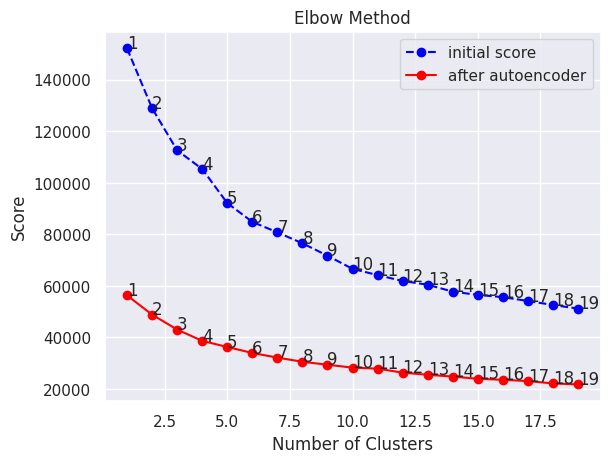

In [264]:
plt.plot(range(1, 20), score, marker='o', linestyle='--', color='blue')
plt.plot(range(1, 20), score2, marker='o', linestyle='-', color='red')

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.legend(['initial score', 'after autoencoder',])

for i, txt in enumerate(range(1, 20)):
    plt.annotate(txt, (range(1, 20)[i], score2[i]))
    plt.annotate(txt, (range(1, 20)[i], score[i]))

plt.show()

In [265]:
kmeans=KMeans(4, random_state=42)
kmeans.fit(predictions)
labels=kmeans.labels_

In [266]:
pca = PCA(2, random_state=42)
principal_comp = pca.fit_transform(predictions)
pca_df = pd.DataFrame(data=principal_comp, columns= ['pca1', 'pca2'])
pca_clusters = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

## PCA scatterplot (4 clusters)

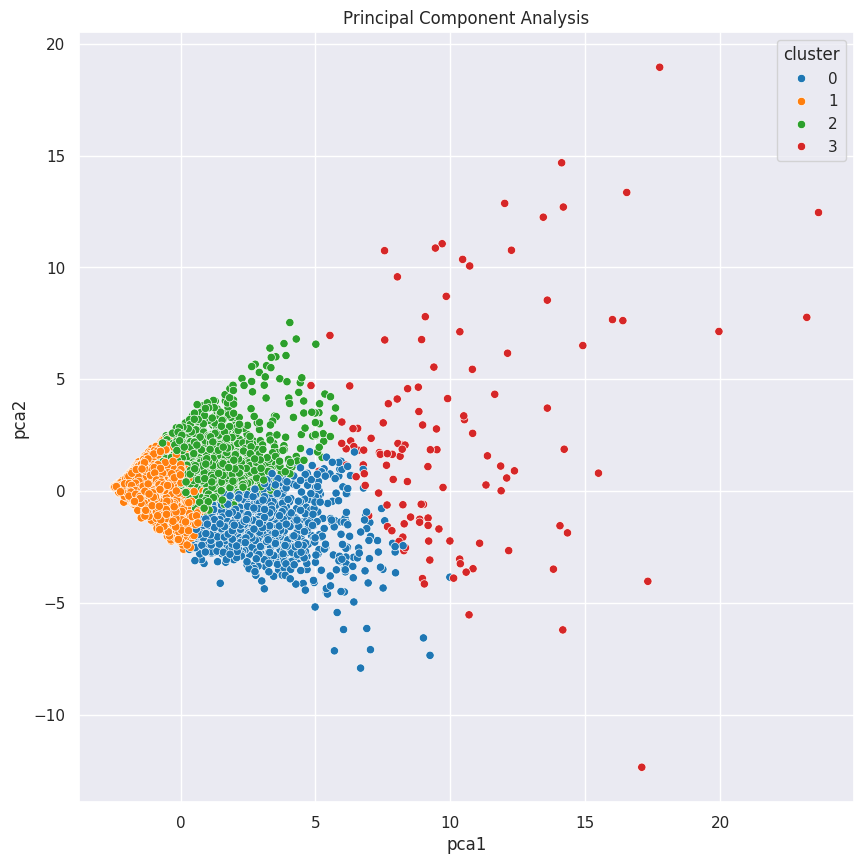

In [267]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_clusters, palette="tab10")
plt.title('Principal Component Analysis')
plt.show()

**The scatter plot clearly reveals four distinct clusters with well-defined boundaries and no overlap.This suggests that the data points within each cluster are well separated, making it easy to differentiate between the groups**.

In [268]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance for PCA1 and PCA2
cumulative_explained_variance = np.sum(explained_variance_ratio) * 100

print(f'PCA1 and PCA2 together explain {cumulative_explained_variance:.2f}% of the variance.')

PCA1 and PCA2 together explain 67.62% of the variance.


# A Comprehensive Exploration of 4 Data Clusters

In [269]:
df_cluster_autoencoder = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster_autoencoder.shape

(8950, 18)

In [282]:
df_final = df_cluster_autoencoder.groupby('cluster')
df_final.describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1107.0  4993.425384  2458.893446  27.585915  3192.998449   
1        6222.0   835.974560   956.782873   0.000000    61.634973   
2        1498.0  1557.531020  1483.006660   9.755390   335.720182   
3         123.0  7639.940033  4286.508876   4.382924  4197.011851   

                                                 BALANCE_FREQUENCY            \
                 50%           75%           max             count      mean   
cluster                                                                        
0        4890.470857   6494.271698  15258.225900            1107.0  0.967708   
1         477.635410   1307.882736   5925.829310            6222.0  0.834675   
2        1037.034497   2416.717545   7803.470739            1498.0  0.980763   
3        7533.854422  10533.575205  19043.138560             123.0  0.957618   

         ... PRC_FULL_PAYMENT       TENURE                                  \
         ...              75%  max   count       mean       std  min   25%   
cluster  ...                                                                 
0        ...         0.000000  1.0  1107.0  11.337850  1.573298  6.0  12.0   
1        ...         0.142857  1.0  6222.0  11.500804  1.345332  6.0  12.0   
2        ...         0.555556  1.0  1498.0  11.694927  1.109738  6.0  12.0   
3        ...         0.250000  1.0   123.0  11.804878  0.874582  6.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  

[4 rows x 136 columns]

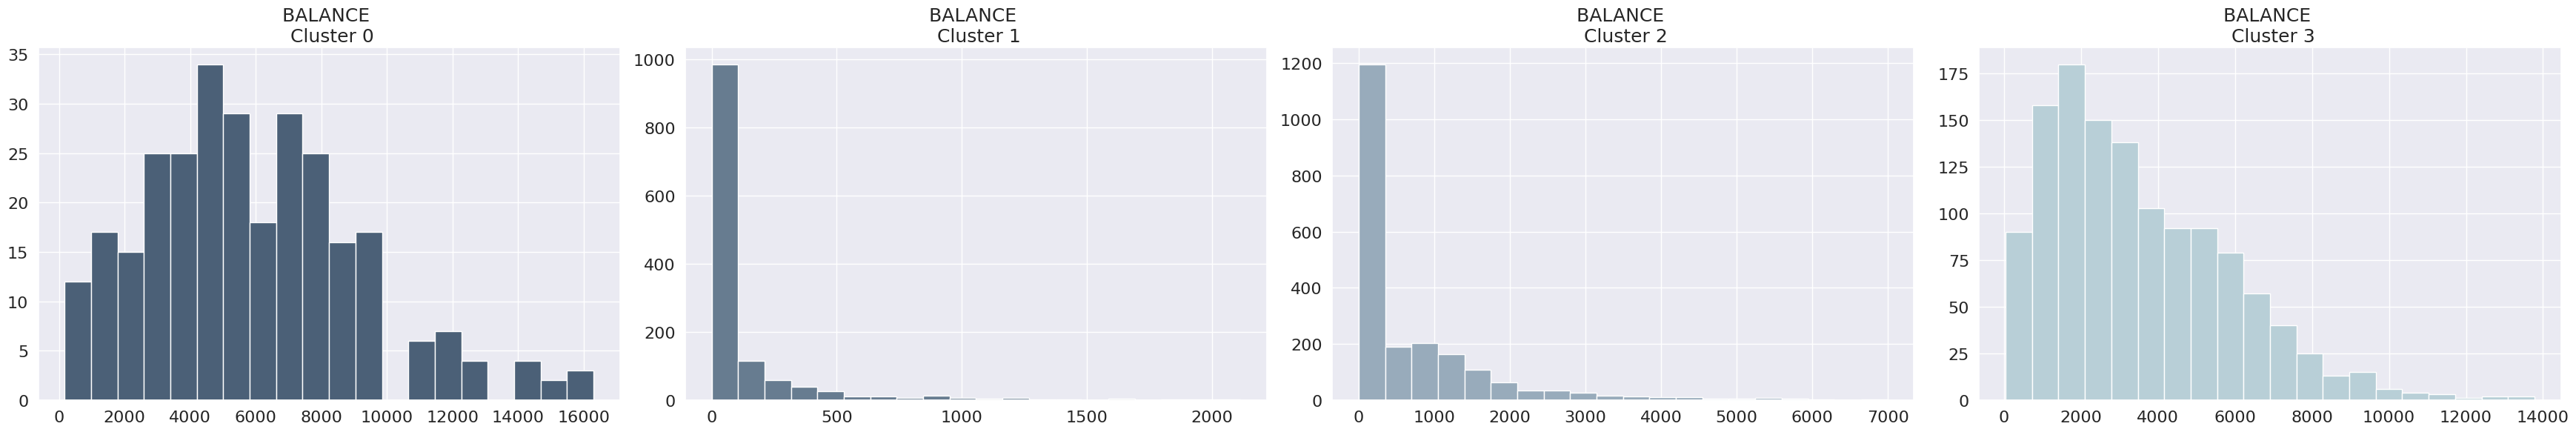

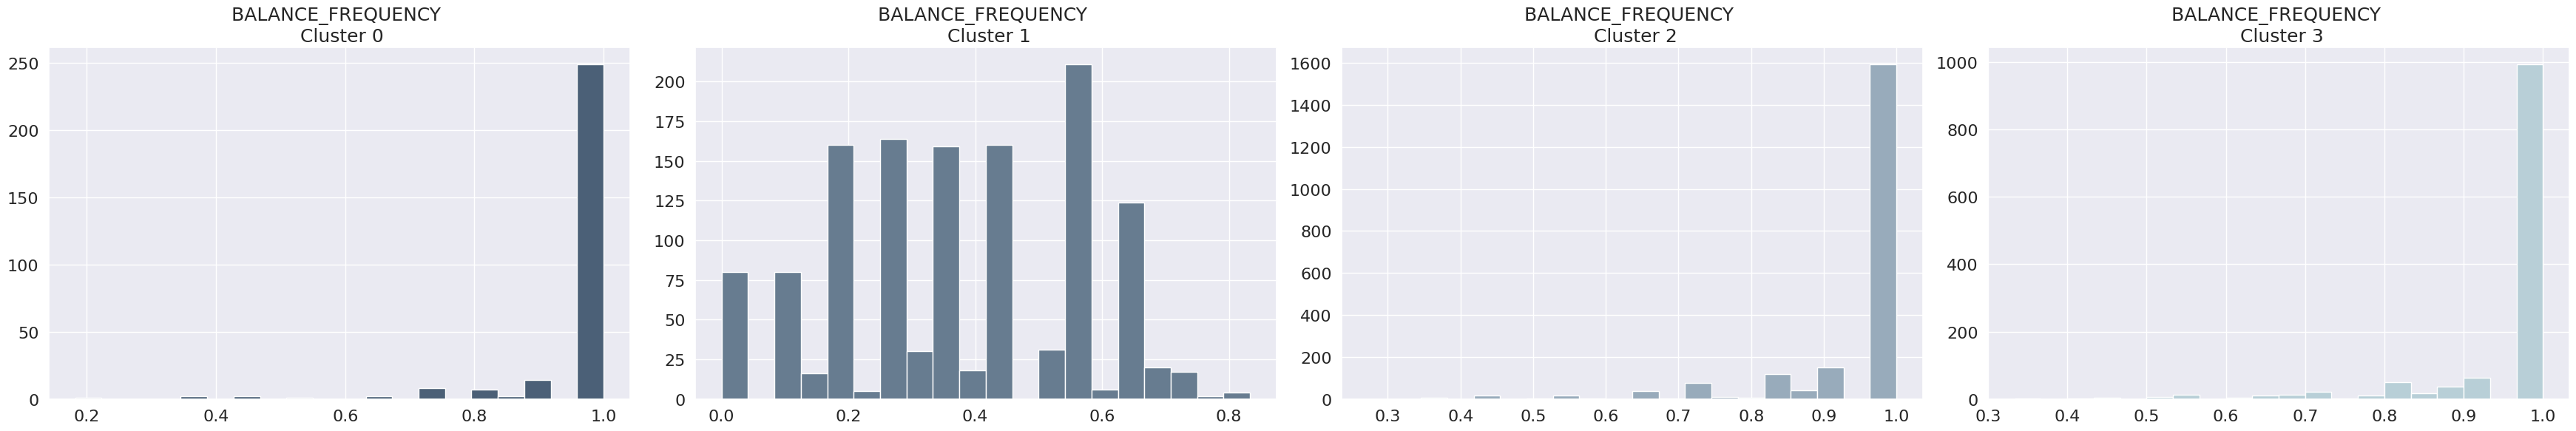

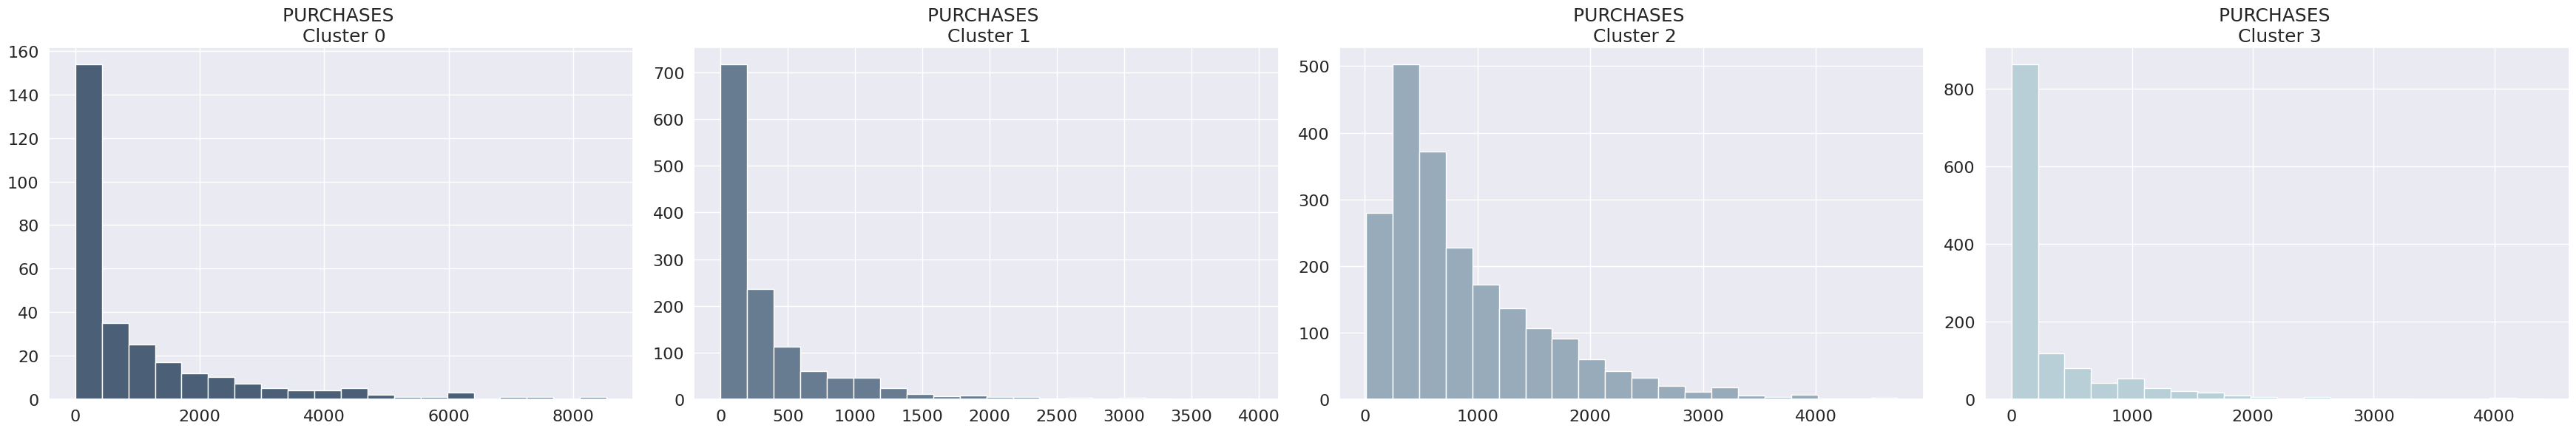

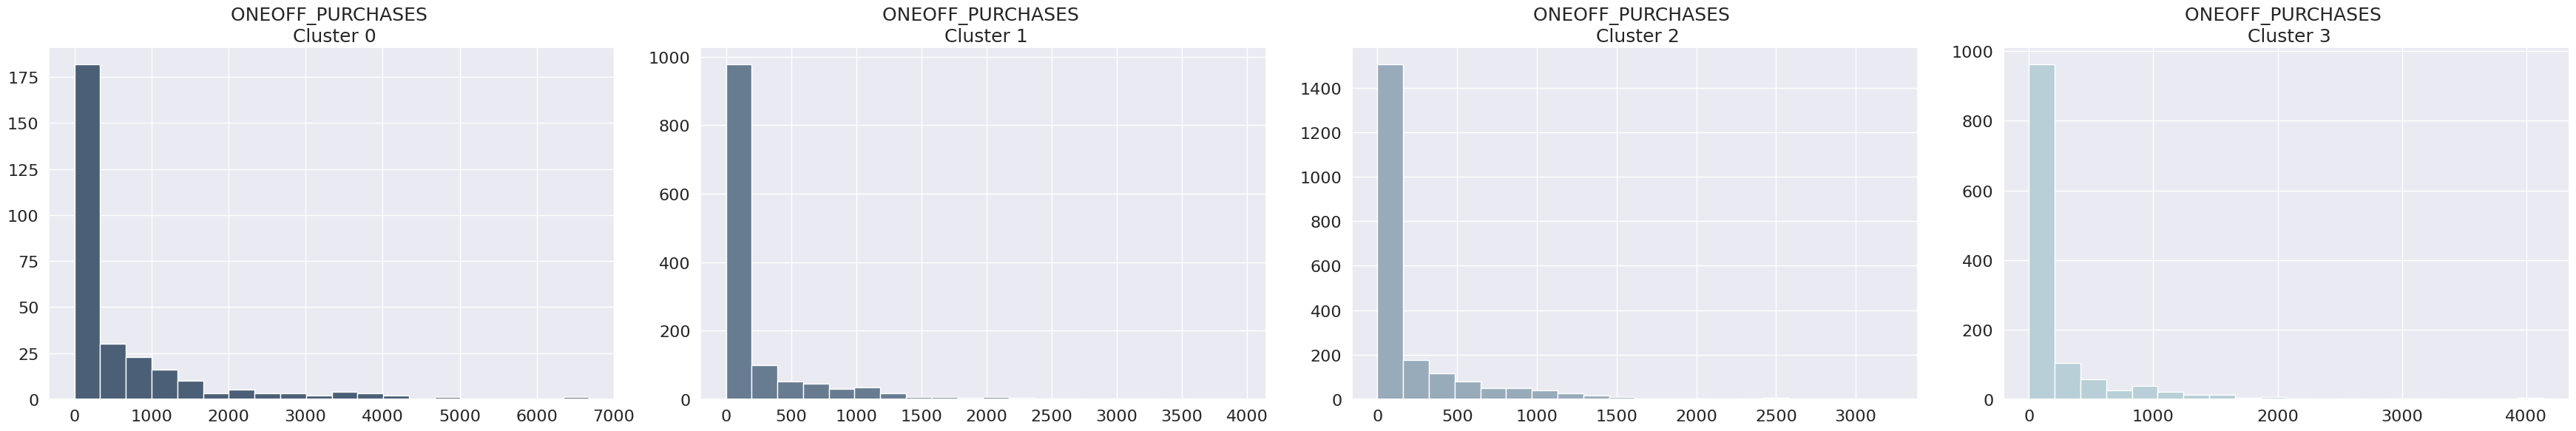

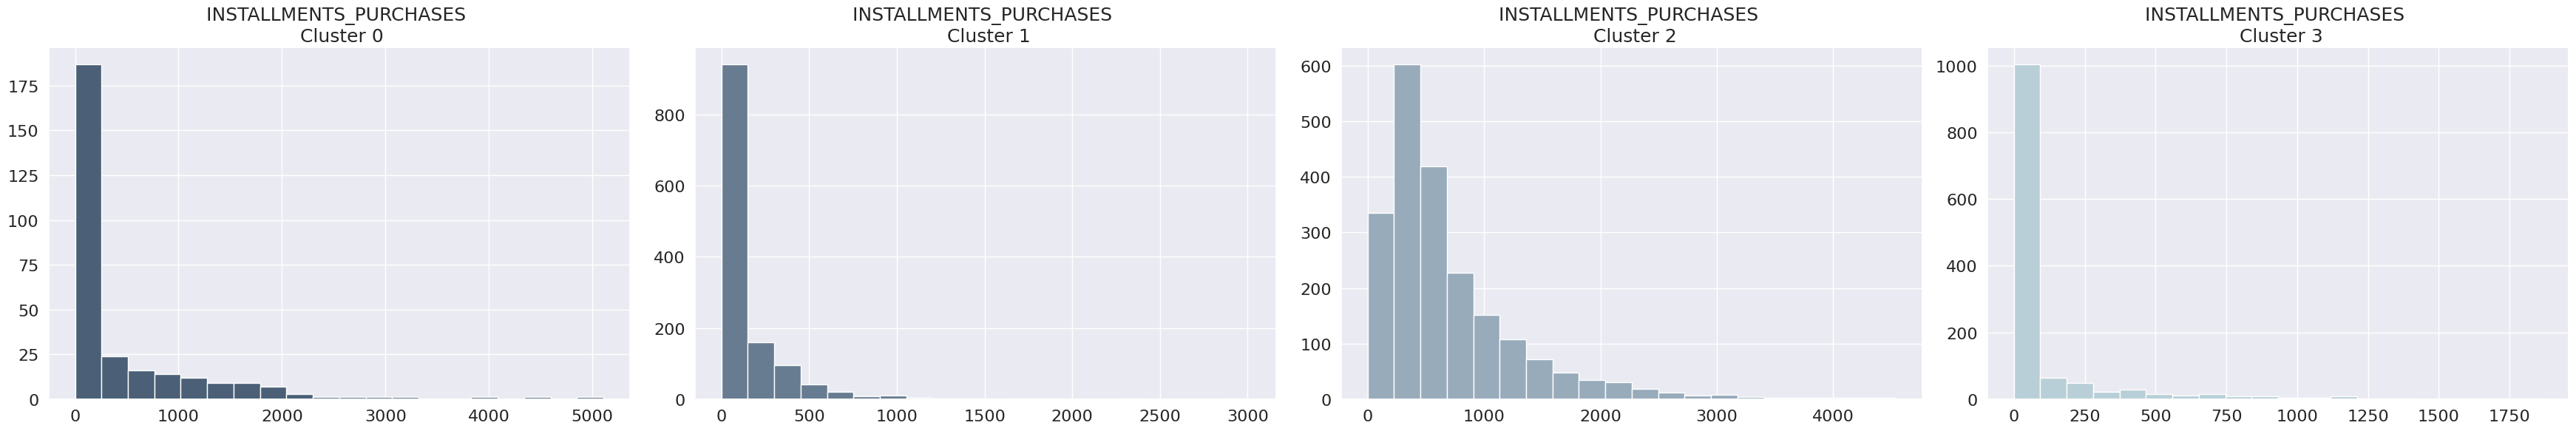

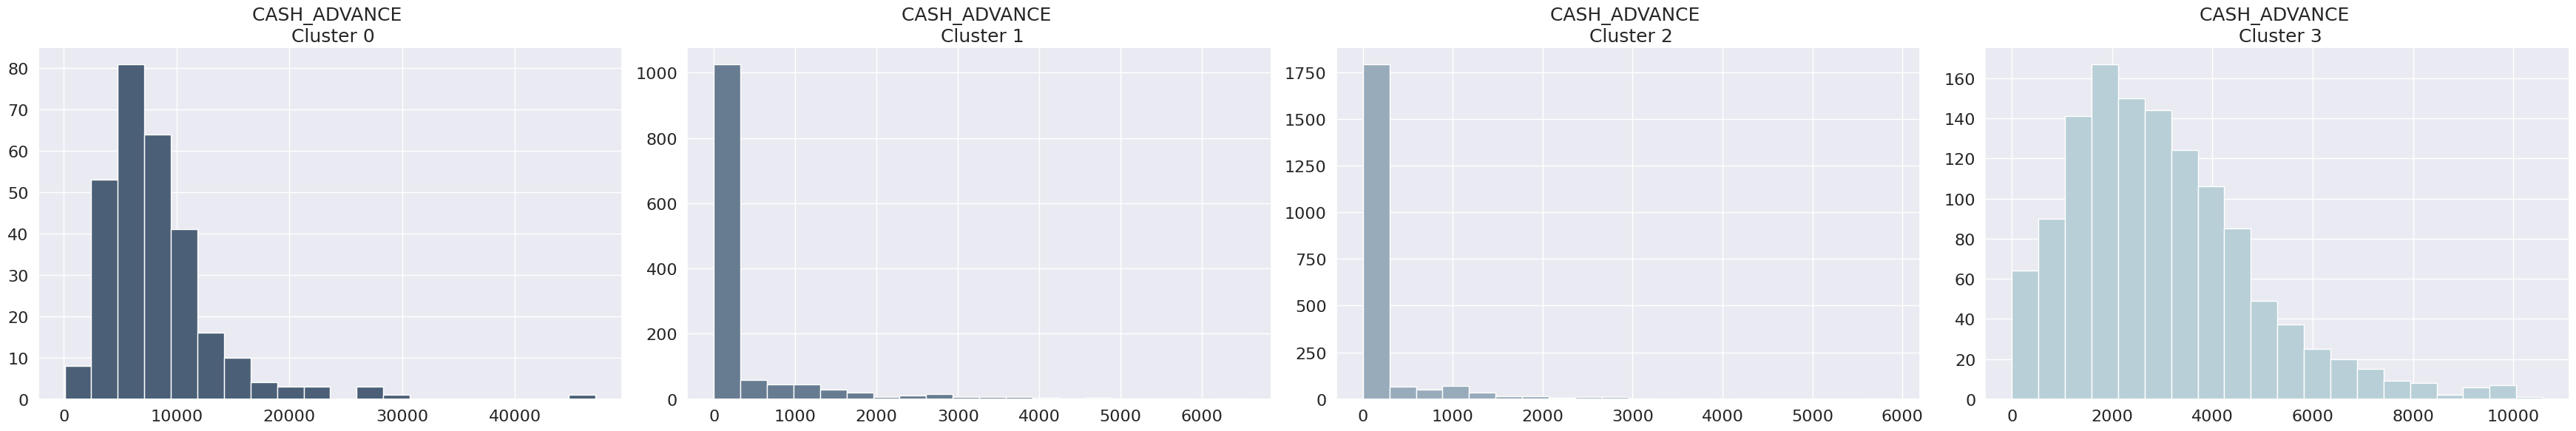

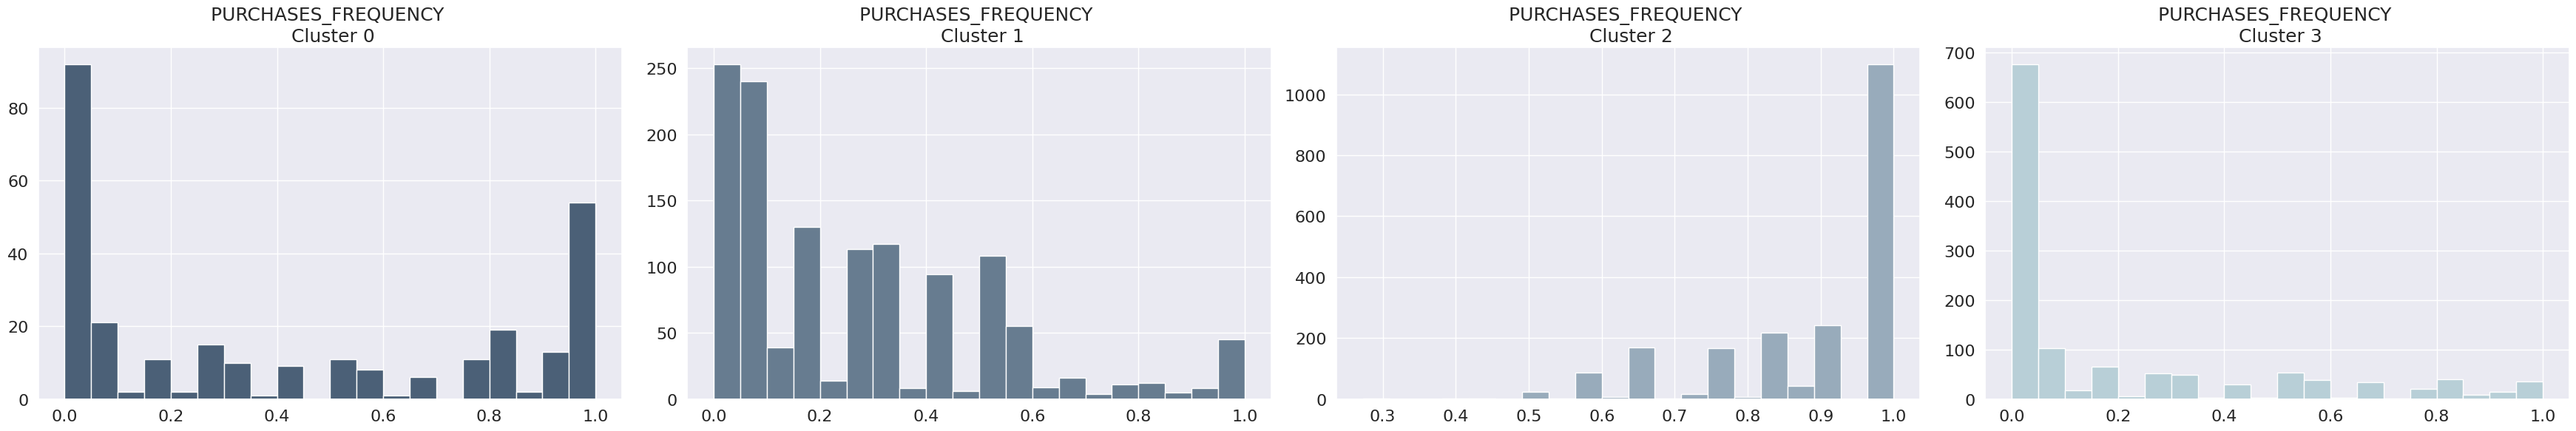

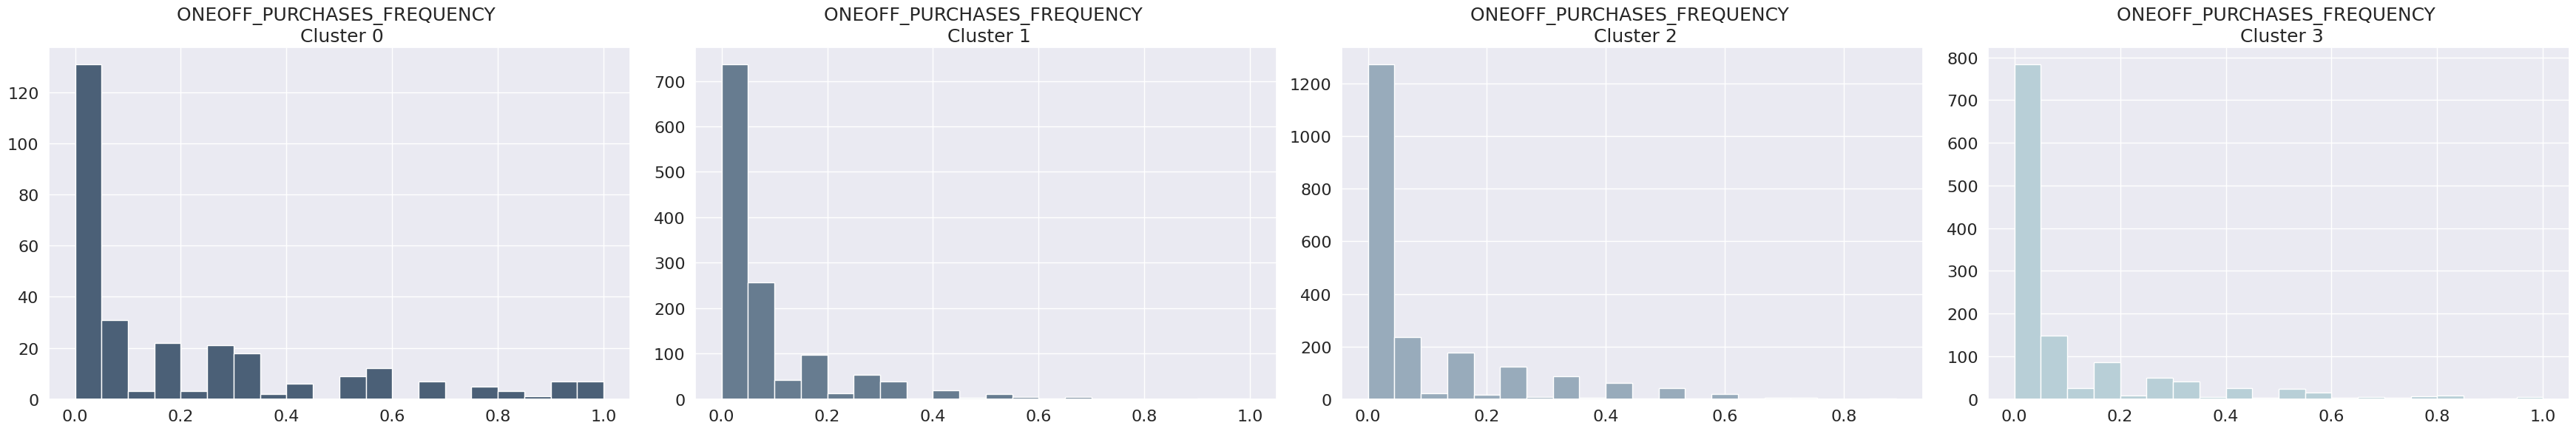

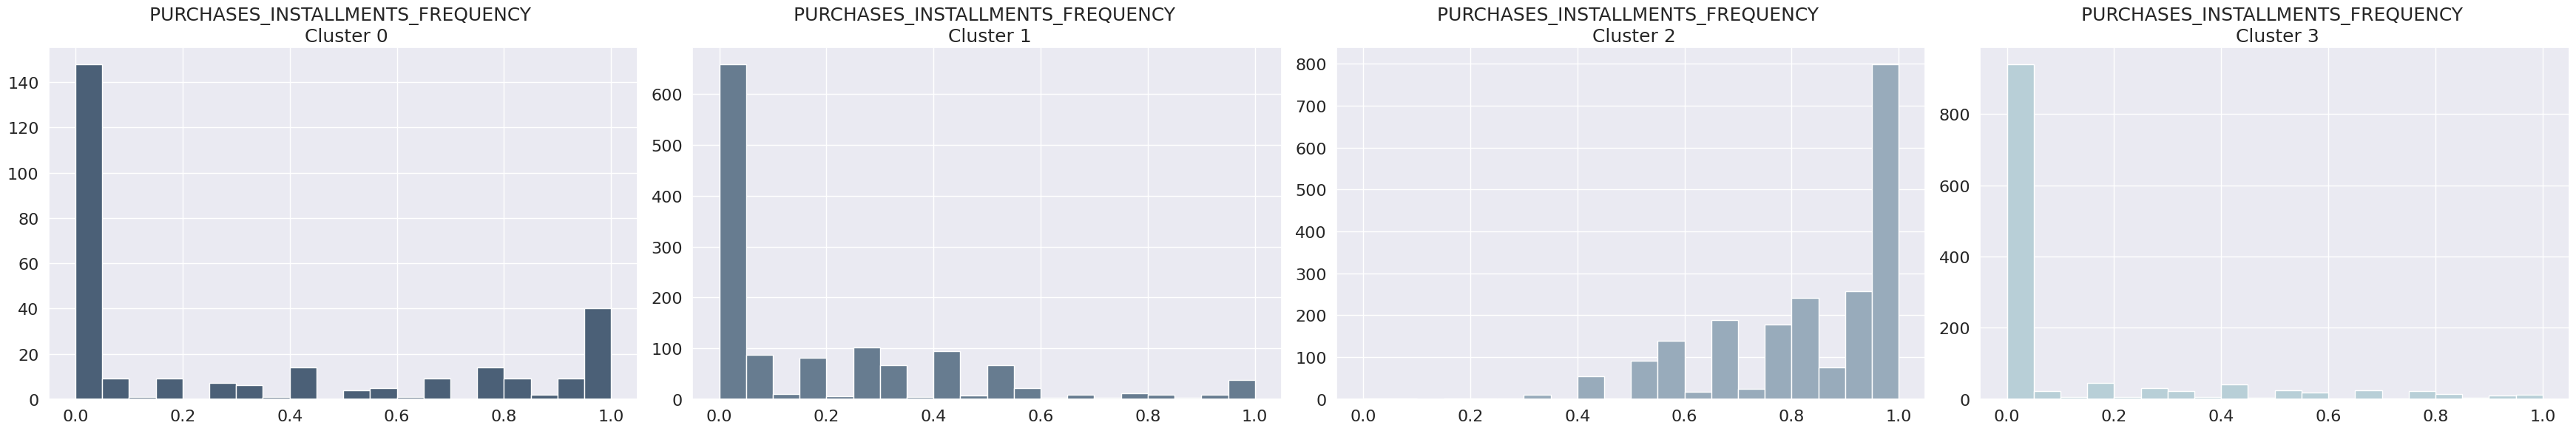

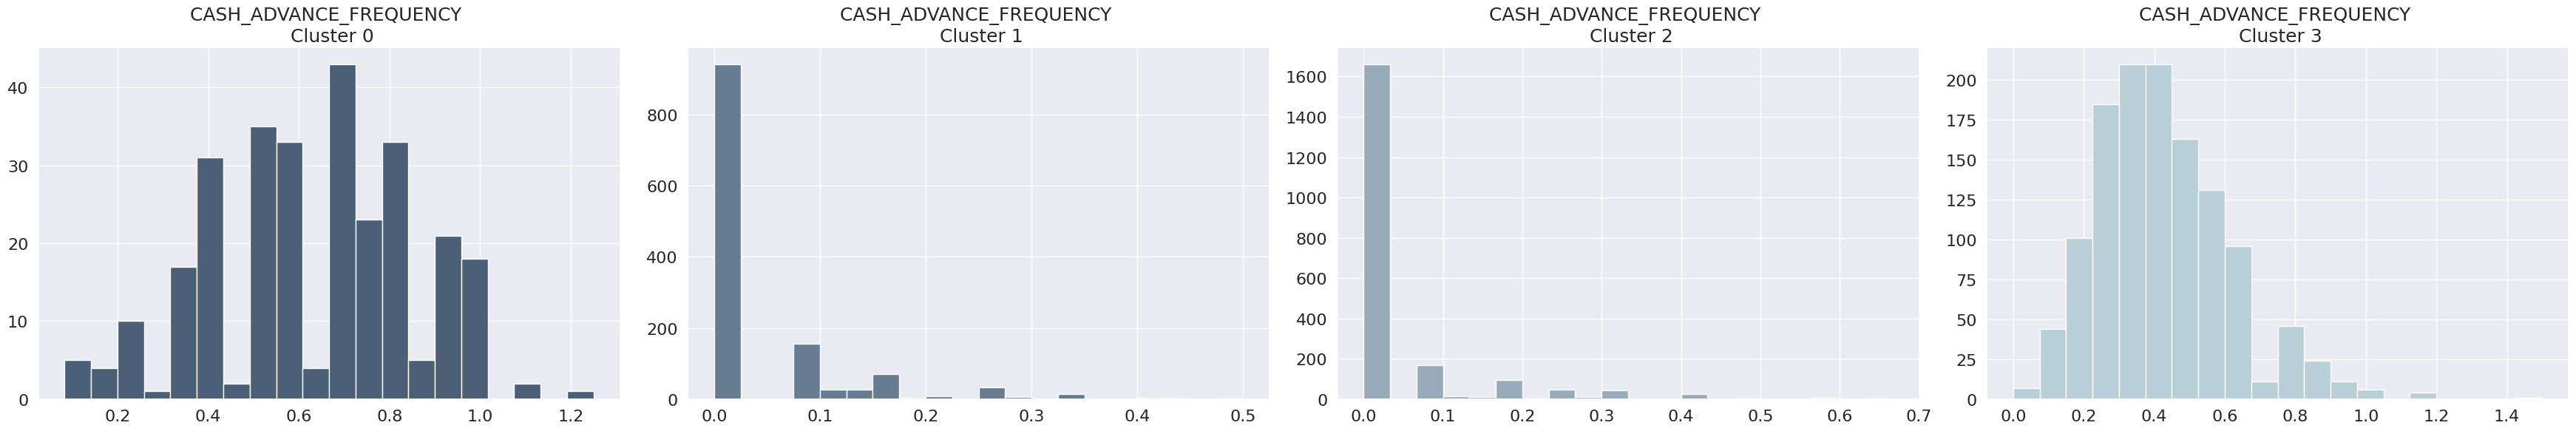

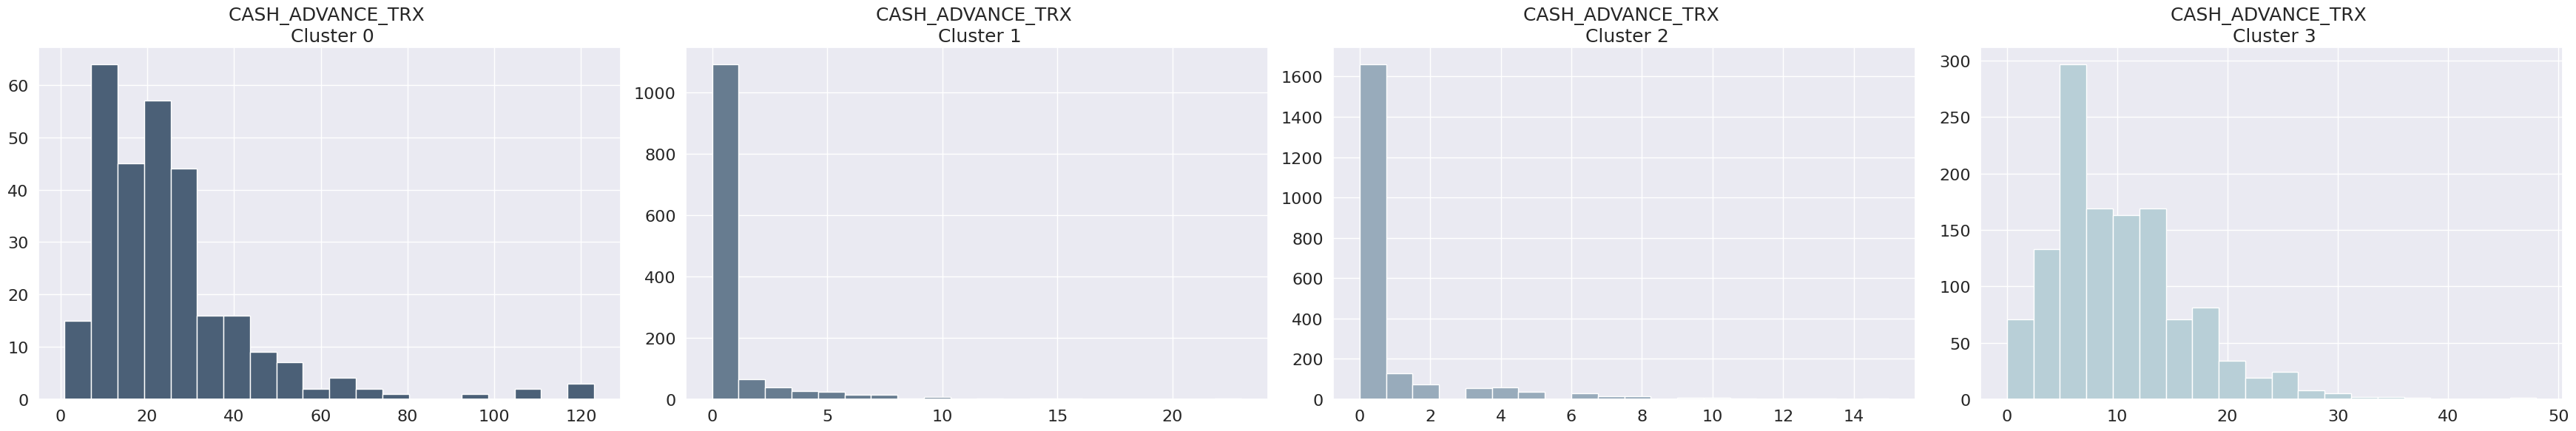

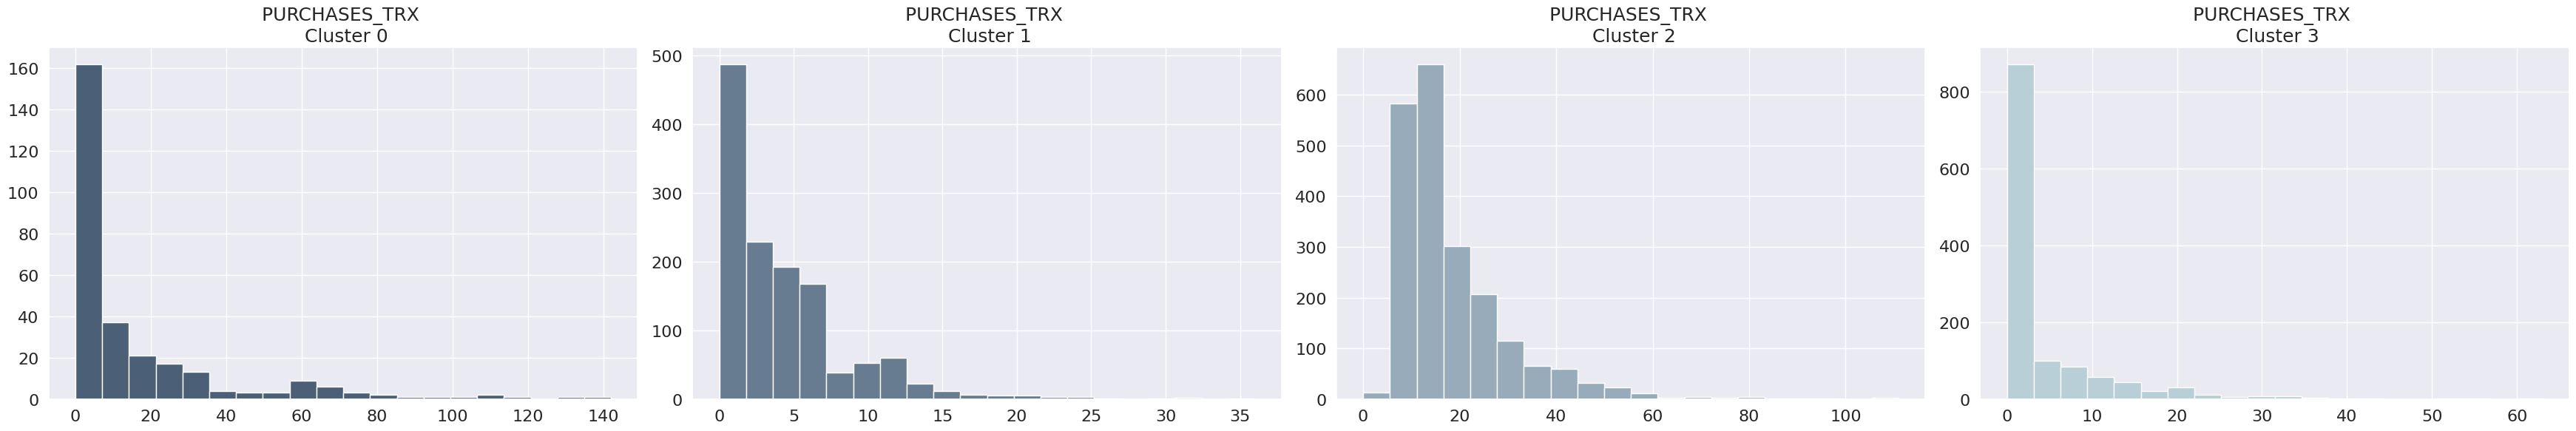

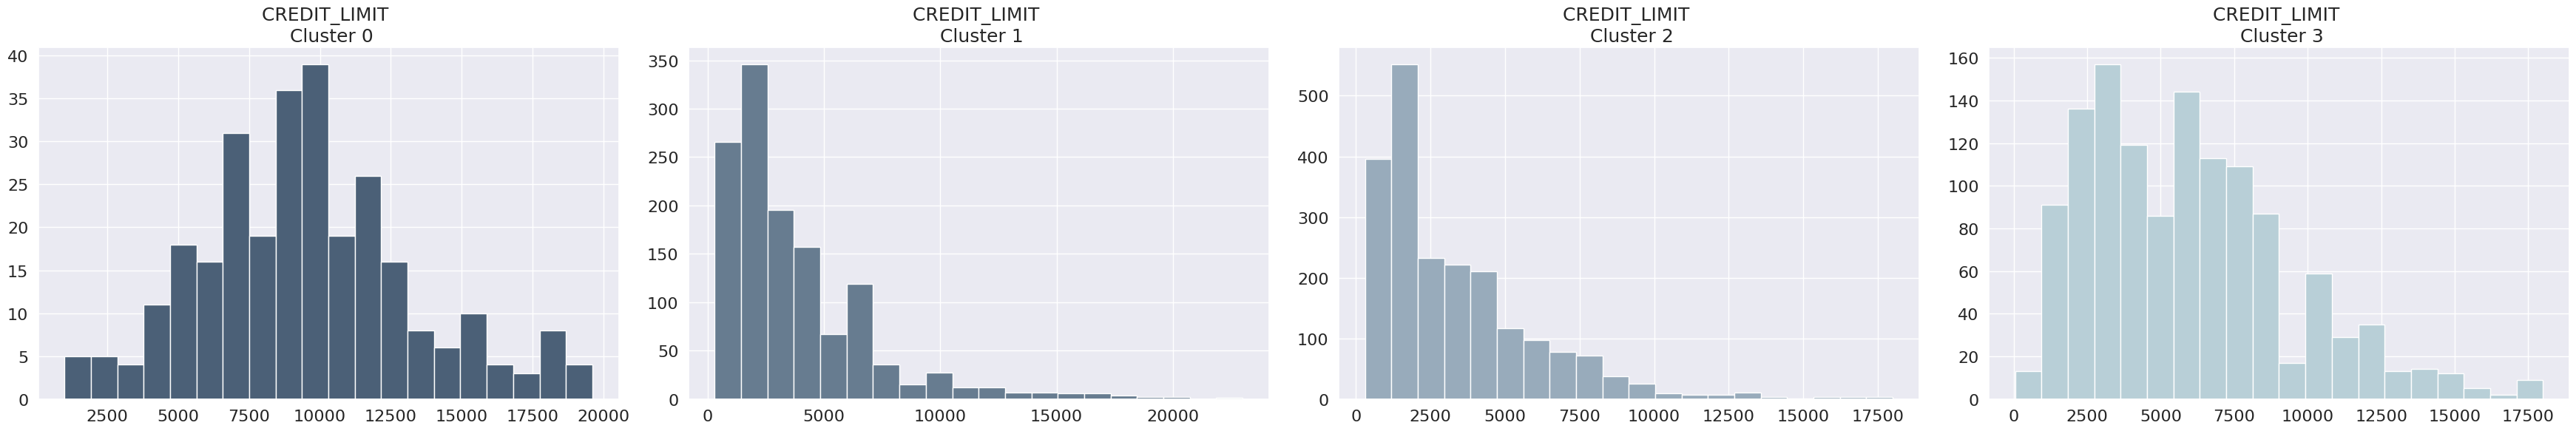

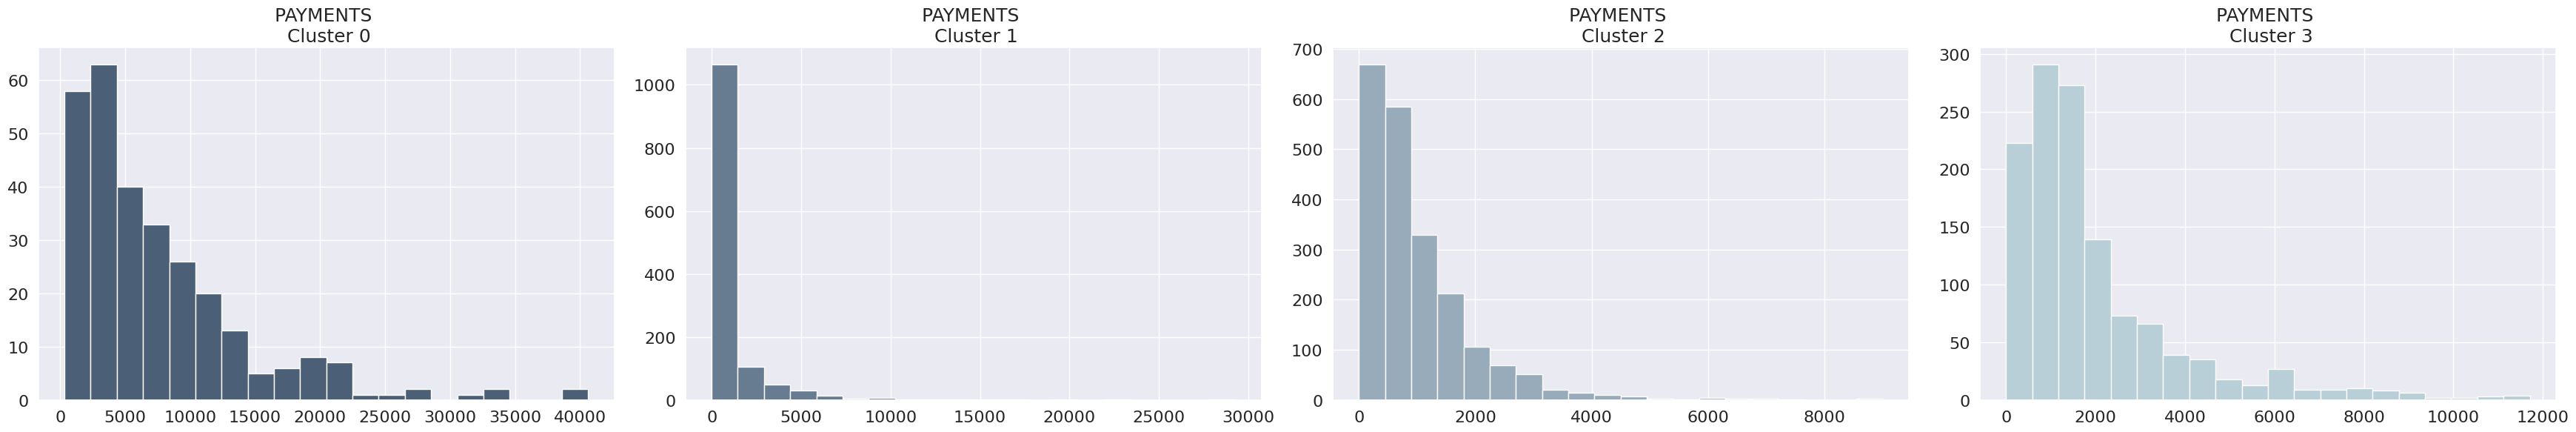

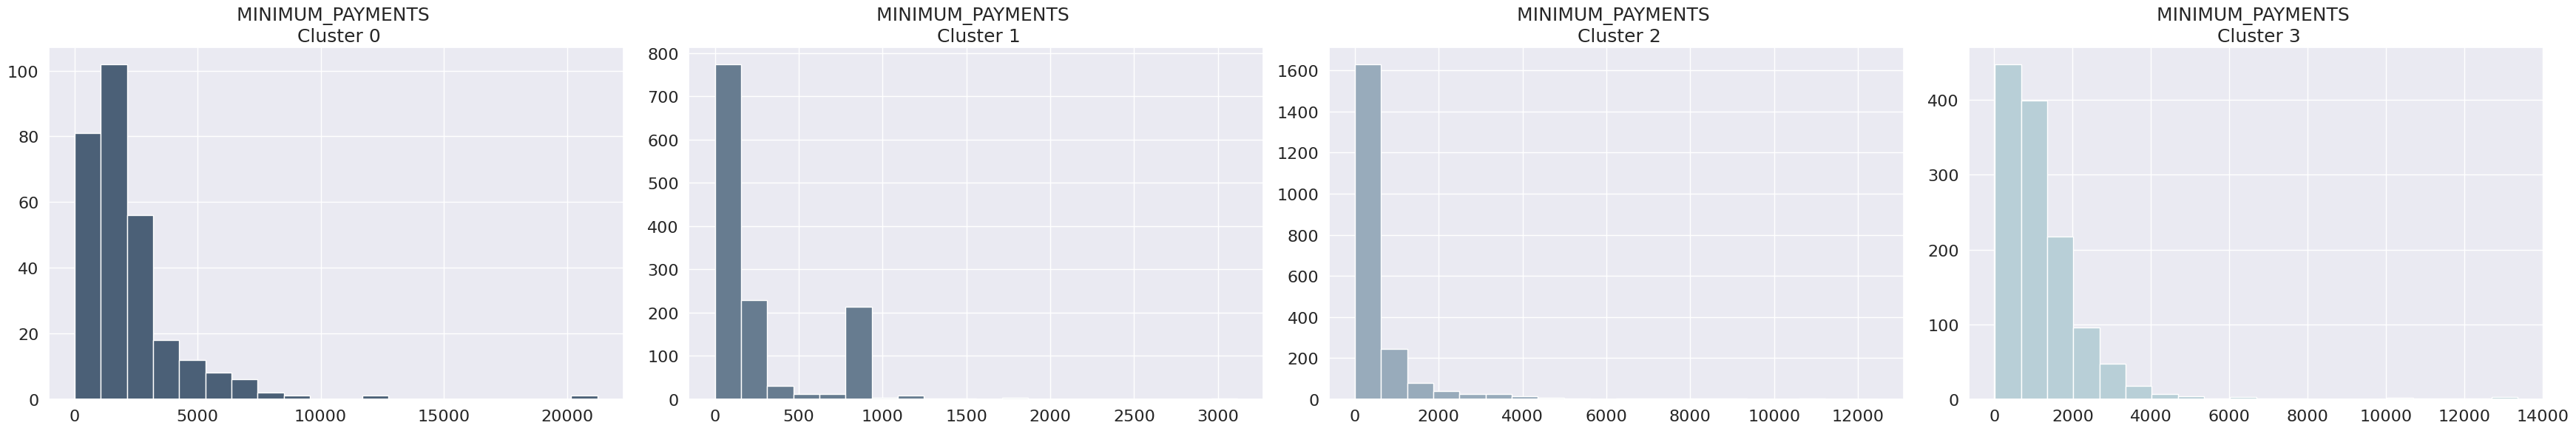

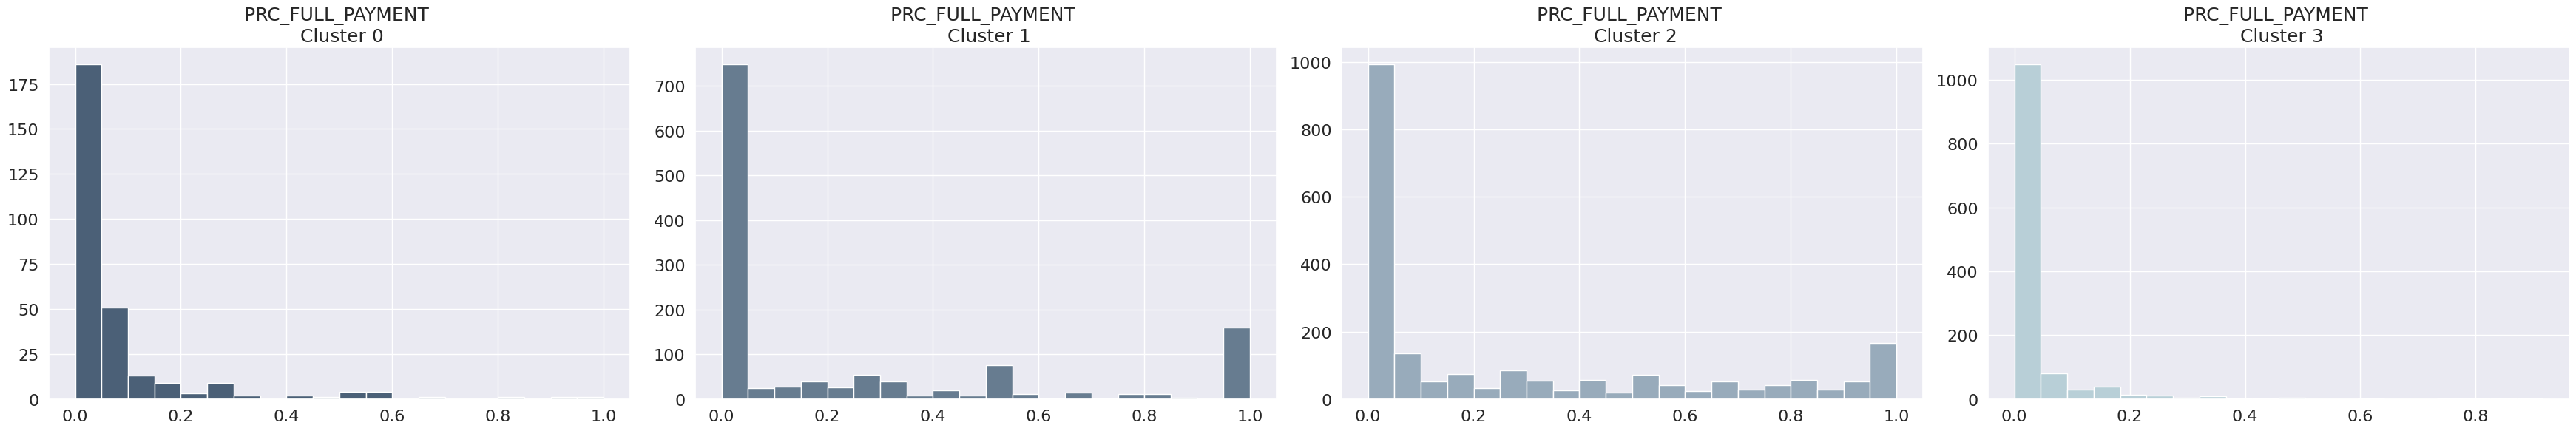

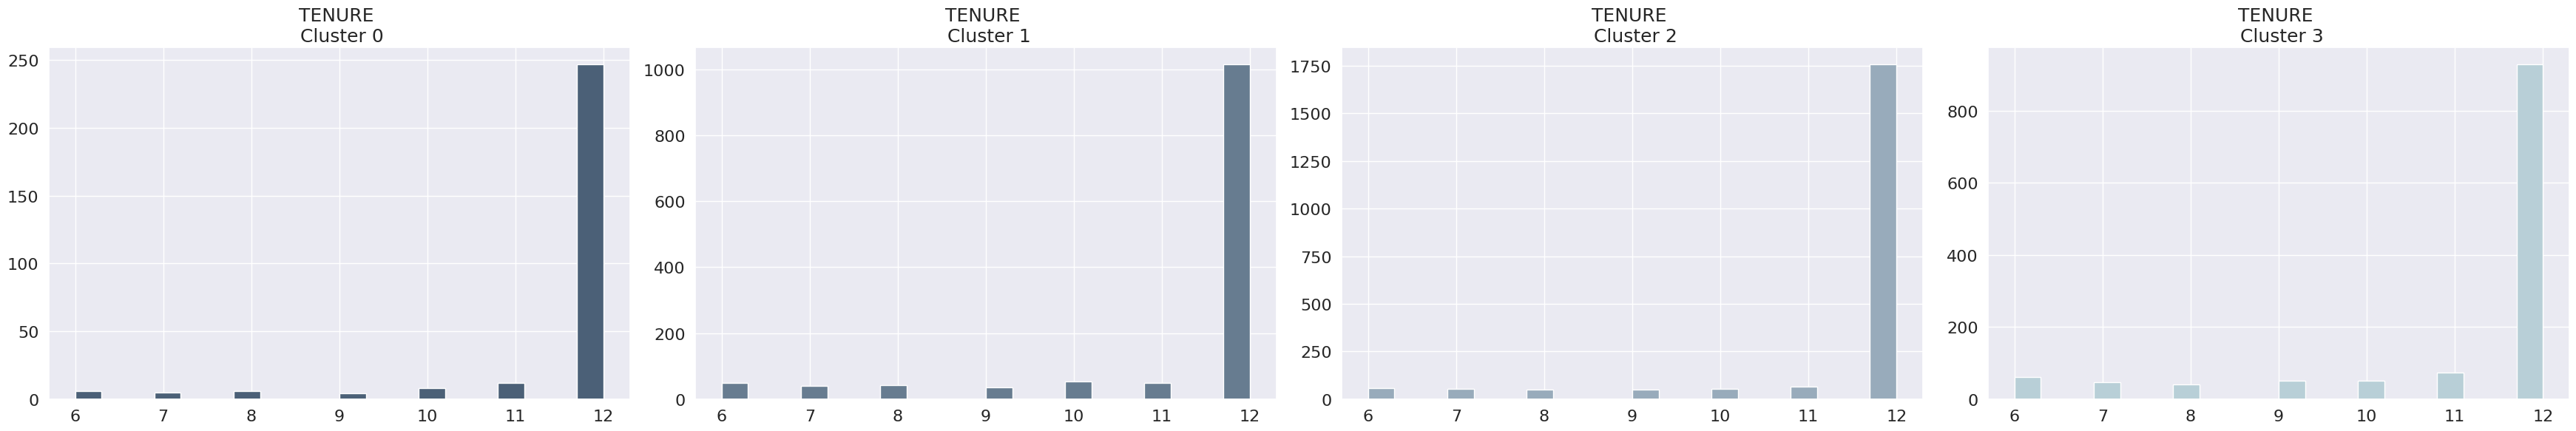

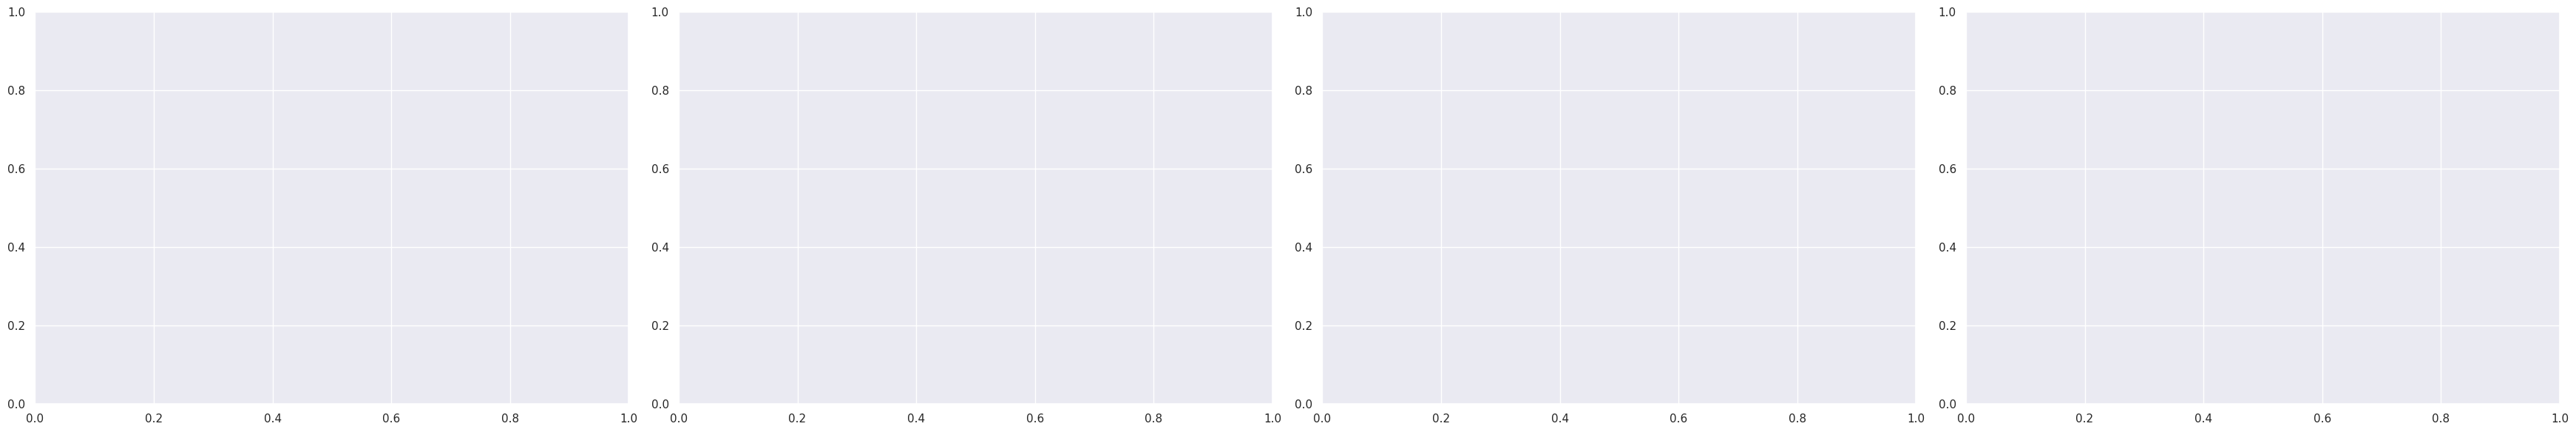

In [270]:
# let's see data distribution for each cluster
colors = ["#4b6077","#677c90", "#98abbb", "#b8cfd7"]

for i in df_cluster_autoencoder.columns:
    fig, axes = plt.subplots(1, 4, figsize=(35, 6), sharey=False)


    for j, ax in enumerate(axes):
        cluster = df_cluster[df_cluster['cluster'] == j]
        if i != 'cluster':
          ax.hist(cluster[i], bins=20, color = colors[j])
          ax.set_title('{} \n Cluster {}'.format(i, j), fontsize=18)
          ax.tick_params(axis='both', labelsize=16)

    plt.tight_layout()
    plt.show()
    plt.close(fig)

**We can see that the 4-cluster analysis simplifies the detailed segments from the 8-cluster analysis into broader categories, making it more manageable.**

**It’s likely that our low-engagement (from 8-cluster analysis) clients have been placed in Cluster 1. We can also identify "Revolving Credit Users" in the new Cluster 0, and possibly in Cluster 3. "Regular Purchasers" are now in Cluster 2, while "Luxury Purchasers" are likely in Cluster 3**.

In [307]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_TRX', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',  'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
        'CREDIT_LIMIT', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY',
        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster']

In [308]:
# summary statistics for each cluster
cluster_summary = df_cluster_autoencoder[cols].groupby('cluster').agg(['mean'])
cluster_summary = df_cluster_autoencoder.groupby('cluster').agg(['mean'])
cluster_summary.columns
cluster_summary['Client_Count'] = df_cluster_autoencoder.groupby('cluster').size()
cluster_summary.insert(0, 'Client_Count', cluster_summary.pop('Client_Count'))
cluster_summary

Client_Count      BALANCE BALANCE_FREQUENCY     PURCHASES  \
                             mean              mean          mean   
cluster                                                             
0               1107  4993.425384          0.967708    803.323993   
1               6222   835.974560          0.834675    420.571731   
2               1498  1557.531020          0.980763   2805.043611   
3                123  7639.940033          0.957618  10330.495610   

        ONEOFF_PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE  \
                    mean                   mean         mean   
cluster                                                        
0             486.399684             317.016152  4100.449036   
1             194.542073             226.332448   529.301809   
2            1838.842597             966.654286   238.542374   
3            6494.658780            3836.015691  4642.658855   

        PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
                       mean                       mean   
cluster                                                  
0                  0.370333                   0.178955   
1                  0.403570                   0.091228   
2                  0.910622                   0.651706   
3                  0.841907                   0.569243   

        PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY  \
                                    mean                   mean   
cluster                                                           
0                               0.260952               0.441237   
1                               0.319257               0.100423   
2                               0.599541               0.045965   
3                               0.717969               0.222791   

        CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
                    mean          mean          mean          mean   
cluster                                                              
0              12.943089     12.687444   8182.479264   3476.376564   
1               2.013018      7.678721   3179.237579    937.218185   
2               0.829773     39.807076   6397.130720   2644.161682   
3               7.975610     82.926829  14660.162602  15211.080267   

        MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
                    mean             mean       mean  
cluster                                               
0            2389.141527         0.027981  11.337850  
1             558.392612         0.146532  11.500804  
2             708.229658         0.273399  11.694927  
3            4509.122173         0.191060  11.804878


**Cluster 1: "Low Spend, Low Balance"**

Clients in this cluster are characterized by a relatively low balance, low purchasing activity, and modest use of credit. They are likely individuals who do not rely heavily on their credit cards or have lower access to credit. These clients might be more conservative spenders, possibly focused on paying off existing balances.


**Cluster 2: "High Spend, Moderate Balance"**

Clients in this cluster show a balanced approach to spending and credit. They have a moderate credit limit and tend to make moderate purchases with a decent use of cash advances and installment payments. They are likely individuals who are more active with their credit cards compared to those in Cluster 0, but their spending is still not as high as those in Cluster 2 or 3.


**Cluster 2: "Low Spend, High Balance, High Credit"**

These clients have a high credit limit and a significantly high balance but tend to spend very little on purchases. Their high cash advance usage suggests they may be more likely to use credit for non-purchase purposes, such as managing liquidity. This group might include individuals with large available credit but conservative spending habits or those who prefer using cash advances for large expenses.


**Cluster 3: "High Spend, High Balance, High Credit"**

Clients in this cluster have the highest balances and the highest credit limits. They are also the heaviest spenders, making large purchases and frequently using installments and cash advances. This group is likely to consist of individuals with high incomes or those with significant financial flexibility. They are active credit users and may use credit to fund various purchases, both large and small.

In [273]:
clients = cluster_summary['Client_Count'].reset_index()
clients['Percent'] = (clients['Client_Count'] / clients['Client_Count'].sum()) * 100
clients

cluster  Client_Count    Percent
0        0          1107  12.368715
1        1          6222  69.519553
2        2          1498  16.737430
3        3           123   1.374302

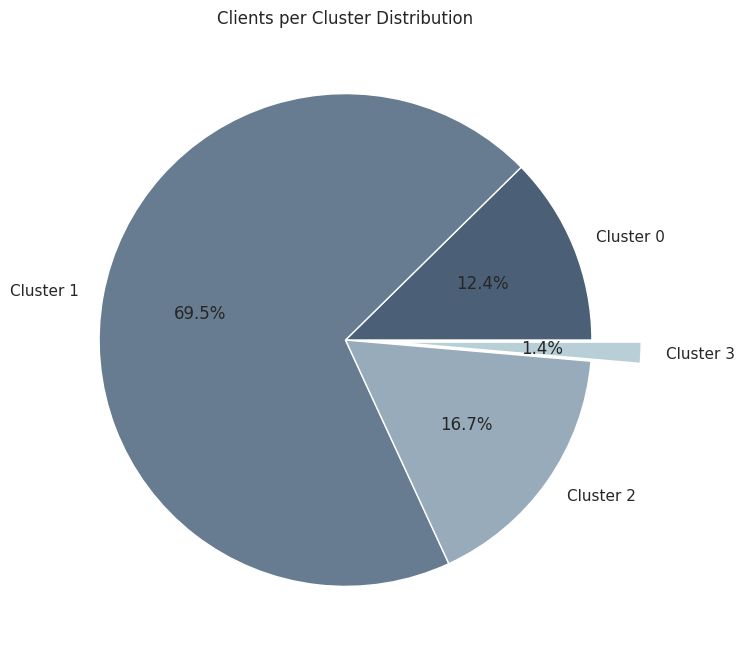

In [274]:
plt.figure(figsize=(8,8))
plt.pie(
    clients.Percent,
    labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],
    colors=colors,
    explode=(0,0,0,0.2),
    autopct='%.1f%%'
)
plt.title("Clients per Cluster Distribution")
plt.show()

**The majority of bank clients in the dataset belong to Cluster 1, labeled "Low Spend, Low Balance," accounting for nearly 70% of the total. Cluster 2, "High Spend, High Balance," comes second at 17%, followed by Cluster 0 at 12.4%. The smallest group is Cluster 3, "High Spend, High Balance, High Credit," which makes up just 1.2%.**

In [281]:
df_final = df_cluster_autoencoder.groupby('cluster')
df_final.describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1107.0  4993.425384  2458.893446  27.585915  3192.998449   
1        6222.0   835.974560   956.782873   0.000000    61.634973   
2        1498.0  1557.531020  1483.006660   9.755390   335.720182   
3         123.0  7639.940033  4286.508876   4.382924  4197.011851   

                                                 BALANCE_FREQUENCY            \
                 50%           75%           max             count      mean   
cluster                                                                        
0        4890.470857   6494.271698  15258.225900            1107.0  0.967708   
1         477.635410   1307.882736   5925.829310            6222.0  0.834675   
2        1037.034497   2416.717545   7803.470739            1498.0  0.980763   
3        7533.854422  10533.575205  19043.138560             123.0  0.957618   

         ... PRC_FULL_PAYMENT       TENURE                                  \
         ...              75%  max   count       mean       std  min   25%   
cluster  ...                                                                 
0        ...         0.000000  1.0  1107.0  11.337850  1.573298  6.0  12.0   
1        ...         0.142857  1.0  6222.0  11.500804  1.345332  6.0  12.0   
2        ...         0.555556  1.0  1498.0  11.694927  1.109738  6.0  12.0   
3        ...         0.250000  1.0   123.0  11.804878  0.874582  6.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  

[4 rows x 136 columns]

In [299]:
clusters = ["Cluster 0: Low Spend, High Balance, High Credit", "Cluster 1: Low Spend, Low Balance", "Cluster 2: High Spend, Moderate Balance", "Cluster 3: High Spend, High Balance, High Credit"]

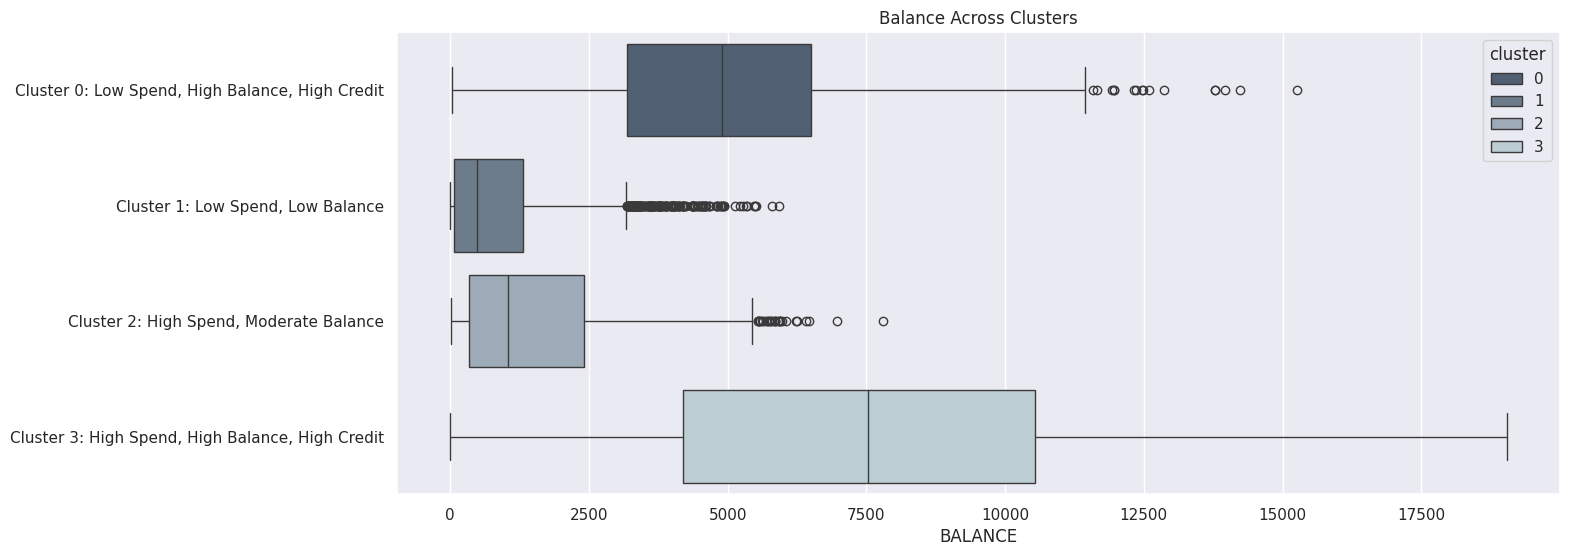

In [304]:
plt.figure(figsize=(15,6))
sns.boxplot(y='cluster', x='BALANCE', data=df_cluster_autoencoder, orient='h', hue='cluster', palette=colors)
plt.ylabel('')
plt.yticks([0, 1, 2, 3], clusters)
plt.title('Balance Across Clusters')
plt.show()

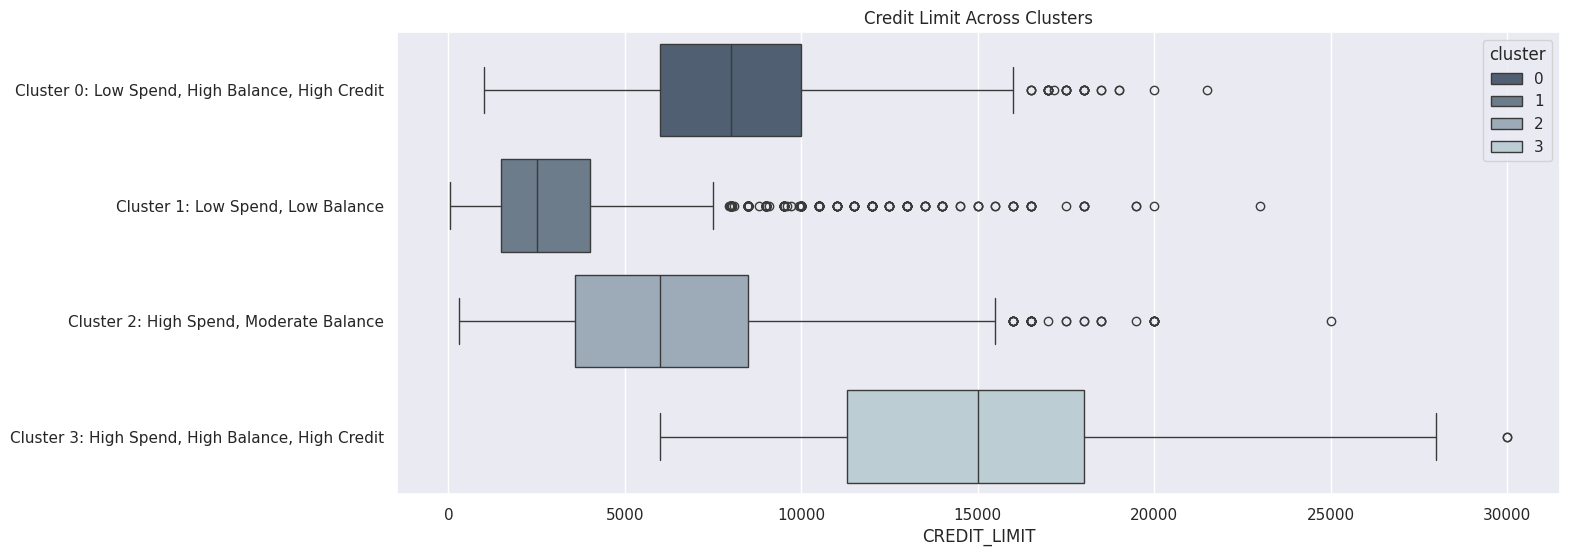

In [305]:
plt.figure(figsize=(15,6))
sns.boxplot(y='cluster', x='CREDIT_LIMIT', data=df_cluster_autoencoder, orient='h', hue='cluster', palette=colors)
plt.ylabel('')
plt.yticks([0, 1, 2, 3], clusters)
plt.title('Credit Limit Across Clusters')
plt.show()

We observe similar patterns in credit limit and balance across the clusters. Clusters 1 and 2, as expected, show lower values that are more concentrated around the median, with less spread and fewer extreme values. In contrast, Clusters 0 and 3 display higher values with broader whiskers, indicating greater dispersion.

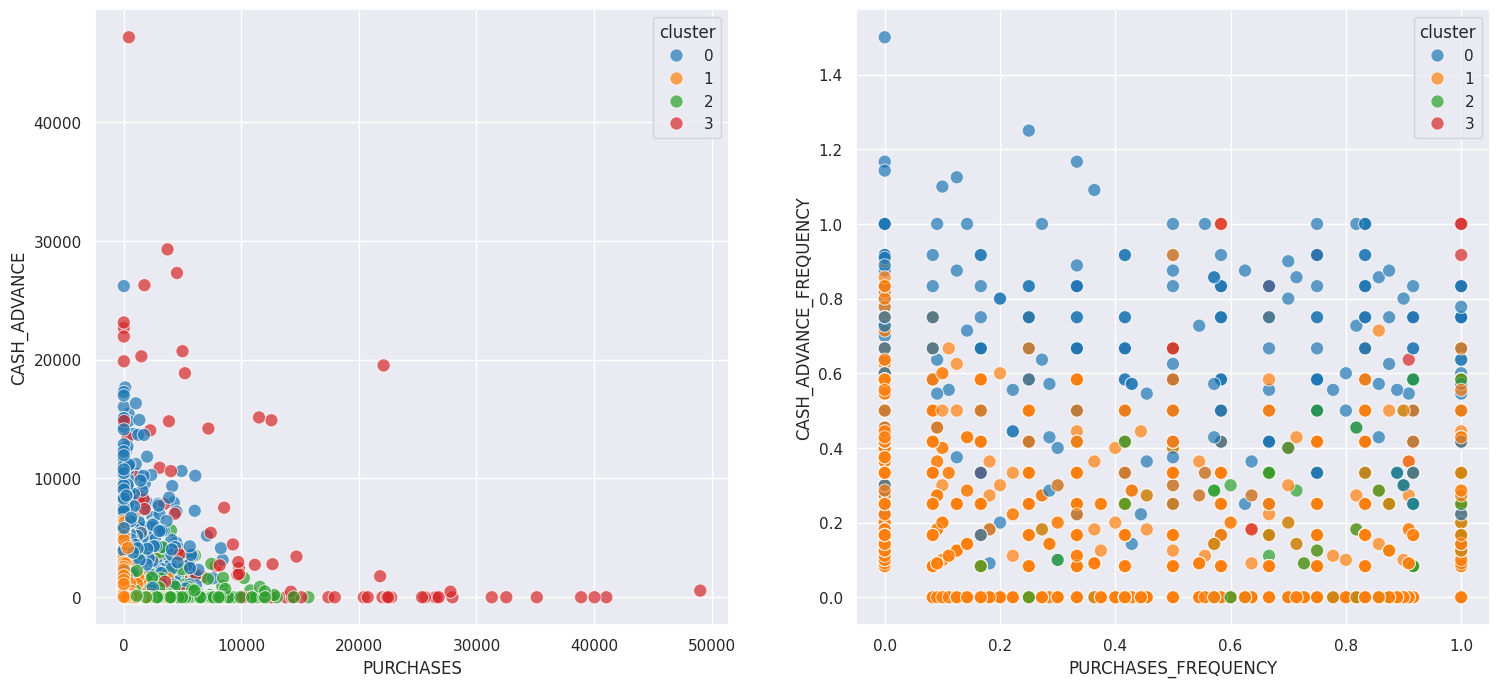

In [332]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(
    data=df_cluster_autoencoder,
    x="PURCHASES",
    y="CASH_ADVANCE",
    hue="cluster",
    s=90,
    alpha=0.7,
    ax=ax[0],
    palette='tab10'
)

sns.scatterplot(
    data=df_cluster_autoencoder,
    x="PURCHASES_FREQUENCY",
    y="CASH_ADVANCE_FREQUENCY",
    hue="cluster",
    s=90,
    alpha=0.7,
    ax=ax[1],
    palette='tab10'
)
plt.show()

Here, we observe a pattern between CASH_ADVANCE and PURCHASES that closely mirrors the one seen in the PCA scatterplot for the four clusters.

In the second graph, we observe that in Cluster 0, both CASH_ADVANCE_FREQUENCY and PURCHASES_FREQUENCY are evenly distributed across the upper portion of the plot. Cluster 1 exhibits a significant proportion of clients with a PURCHASES_FREQUENCY of 0 and a range of low to medium CASH_ADVANCE_FREQUENCY, alongside clients who exhibit the opposite behavior. In Cluster 2, the activity is primarily concentrated in the lower section of the graph. Cluster 3 shows a high degree of dispersion across the entire graph.

## Marketing Strategy Recommendations Based on Customer Clusters

**Based on the analysis of customer clusters and their distinct spending patterns, the following recommendations are proposed to the marketing department to optimize client engagement and increase activity. These recommendations are grounded in statistical insights derived from customer behavior and credit usage patterns.**

**Cluster 1: "Low Spend, Low Balance"** (70% of all clients)

**Recommendations:**

 - **Incentivize Spending:** Statistical analysis suggests that clients in this cluster exhibit lower activity levels. To increase engagement, we recommend launching targeted campaigns offering incentives such as cashback or discounts on specific categories, encouraging higher spending.
- **Gradual Credit Limit Increases:** Given the low balance and conservative credit use, consider offering gradual credit limit increases. This may provide an opportunity to encourage spending without causing clients to feel financially overextended.
- **Educational Initiatives:** Introduce financial education programs that highlight the benefits of responsible credit usage, including how frequent use of credit can improve credit scores and offer financial rewards.
-**Loyalty Programs**: Statistical trends indicate that clients in this cluster tend to have more consistent, modest spending. We suggest creating or enhancing loyalty programs that reward frequent, small purchases, fostering long-term customer engagement.

**Cluster 2: "High Spend, Moderate Balance"**

**Recommendations:**

- **Promote Premium Products: **Clients in this cluster demonstrate moderate credit engagement. Statistical analysis shows they may respond well to targeted upsell offers for premium credit cards, which could further increase spending. These cards could offer enhanced rewards or benefits, such as travel perks or exclusive discounts.
- **Flexible Financing Options:** Considering their moderate credit use, offering installment plans or low-interest financing may encourage larger purchases while maintaining payment manageability. Statistical trends support this approach, as it balances risk with increased spending.
- **Customized Rewards Programs:** Develop rewards programs that cater to clients' spending habits. Personalized offers based on their typical purchasing behavior can boost engagement by providing relevant incentives.
- **Cross-Sell Additional Products:** With a moderate but steady level of activity, these clients represent an ideal segment for cross-selling additional financial products, such as personal loans or insurance, based on predictive analysis of their financial behavior.

**Cluster 0: "Low Spend, High Balance, High Credit"**

**Recommendations:**

- **Reduce Reliance on Cash Advances:** Clients in this group exhibit high balances and significant credit availability but have low spending activity. Statistical modeling suggests they are more likely to use credit for non-purchase purposes. To increase spending, consider promoting lower-cost alternatives to cash advances, such as short-term loans or line-of-credit products with favorable terms.
- **Exclusive and High-Value Offers:** Given their high credit limits, these clients may be responsive to exclusive offers that align with their financial standing. Propose premium rewards programs tailored to their profile, such as discounts on luxury products or services.
- **Financial Management Tools:** Statistical patterns suggest that clients with high balances but low spending may benefit from personalized financial management tools. Offering resources such as budgeting software or financial advisory services can help them better manage their credit use, potentially leading to increased spending.


**Cluster 3: "High Spend, High Balance, High Credit"**

**Recommendations:**

- **Premium Rewards Programs:** This cluster represents the highest-value clients in terms of both spending and credit availability. Statistical insights suggest that offering premium rewards programs with significant benefits, such as travel or concierge services, will resonate well with this group, further encouraging activity.
- **Personalized Financial Services:** Given their high level of financial flexibility, these clients are likely to appreciate personalized financial services. Tailored investment advice or wealth management solutions can deepen engagement while helping clients manage their finances more effectively.
- **VIP Engagement Strategies:** Statistical analysis supports the idea that high-value clients benefit from high-touch engagement. Consider offering VIP services, including personalized support and exclusive offers, to maintain satisfaction and loyalty.
- **Targeted Investment Opportunities:** Given their financial capacity, introducing investment products such as retirement planning or wealth management services could meet their needs while fostering long-term engagement.